# 1 . Import libraries

In [2]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import warnings
# warnings.filterwarnings('ignore')

# 2 . Load data

In [3]:
# Dữ liệu giao dịch (downloading from Google Drive to local path)
file_id = '104tCgXR04q30NzZhUarMAXaqIO5IAEKi'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'transactions_data.csv'
gdown.download(url, output, quiet=False)
trans = pd.read_csv(output)

# Thông tin cá nhân người dùng
file_id = '1lKEAkm4Yqo3sUeRooKqmMg7iR_LyhsW8'
url = 'https://drive.google.com/uc?id='
users = pd.read_csv(url + file_id)

# Thông tin thẻ
file_id = '1ZK-s7Ja6BgOCTfAygQYuGSZj4GrANFoR'
url = 'https://drive.google.com/uc?id='
cards = pd.read_csv(url + file_id)

# Thông tin mã ngành
file_id = '1E6fMv4QwbnubYz5l3b6PdNtMFy4S_Obq'
url = 'https://drive.google.com/uc?id='
mcc_raw = pd.read_json(url + file_id, typ='series')
mcc_codes = mcc_raw.reset_index()
mcc_codes.columns = ['mcc', 'description']

# Thông tin Gross Margin (by using a reseach online
# from the link https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/margin.html)
url = 'https://raw.githubusercontent.com/TuanTran2025/Final-Project/main/mcc_gross_margin.xlsx'
mcc_gross_margin = pd.read_excel(url, sheet_name='MCC')

Downloading...
From (original): https://drive.google.com/uc?id=104tCgXR04q30NzZhUarMAXaqIO5IAEKi
From (redirected): https://drive.google.com/uc?id=104tCgXR04q30NzZhUarMAXaqIO5IAEKi&confirm=t&uuid=e704f842-3e2b-4b24-a9a5-acb02351f374
To: /content/transactions_data.csv
100%|██████████| 1.26G/1.26G [00:17<00:00, 71.4MB/s]


# 3 . Clean data

## 3.1. Users Data

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [5]:
users.sample(2)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
727,74,54,74,1965,5,Female,1444 Plum Boulevard,38.86,-104.76,"$20,579","$41,957","$151,027",783,3
185,110,52,72,1967,10,Female,31204 El Camino Lane,30.26,-97.74,"$25,594","$52,186","$42,852",737,4


### Fixing data type

In [6]:
# Đổi tên cột 'id' cho chuẩn hóa khóa
users = users.rename(columns={'id': 'client_id'})

# Chuyển cột 'gender' sang kiểu category
users['gender'] = users['gender'].astype('category')

# Chuyển cột 'address' sang kiểu string
users['address'] = users['address'].astype('string')

# Loại bỏ ký tự $ trong cột 'per_capita_income', 'yearly_income', 'total_debt', chuyển sang kiểu float
users['per_capita_income'] = users['per_capita_income'].replace('[\$,]', '', regex=True).astype(float)
users['yearly_income'] = users['yearly_income'].replace('[\$,]', '', regex=True).astype(float)
users['total_debt'] = users['total_debt'].replace('[\$,]', '', regex=True).astype(float)

<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-964866804.py:11: SyntaxWarning: invalid escape sequence '\$'
  users['per_capita_income'] = users['per_capita_income'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-964866804.py:12: SyntaxWarning: invalid escape sequence '\$'
  users['yearly_income'] = users['yearly_income'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-964866804.py:13: SyntaxWarning: invalid escape sequence '\$'
  users['total_debt'] = users['total_debt'].replace('[\$,]', '', regex=True).astype(float)


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   client_id          2000 non-null   int64   
 1   current_age        2000 non-null   int64   
 2   retirement_age     2000 non-null   int64   
 3   birth_year         2000 non-null   int64   
 4   birth_month        2000 non-null   int64   
 5   gender             2000 non-null   category
 6   address            2000 non-null   string  
 7   latitude           2000 non-null   float64 
 8   longitude          2000 non-null   float64 
 9   per_capita_income  2000 non-null   float64 
 10  yearly_income      2000 non-null   float64 
 11  total_debt         2000 non-null   float64 
 12  credit_score       2000 non-null   int64   
 13  num_credit_cards   2000 non-null   int64   
dtypes: category(1), float64(5), int64(7), string(1)
memory usage: 205.3 KB


### Checking duplication & missing values

In [8]:
# Checking duplicated values => there is NO DUPLICATED VALUES in the users dataframe
users.duplicated().sum()

np.int64(0)

In [9]:
# Checking missing values => there is NO MISSING VALUES in the users dataframe
users.isnull().sum()

,0
client_id,0
current_age,0
retirement_age,0
birth_year,0
birth_month,0
gender,0
address,0
latitude,0
longitude,0
per_capita_income,0


In [10]:
users.sample(2)

,client_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1560,516,35,66,1984,10,Male,34 Summit Drive,32.61,-117.03,16942.0,34542.0,35474.0,697,4
714,1740,36,67,1983,12,Male,42720 East Drive,42.86,-88.33,28215.0,57532.0,61268.0,735,4


## 3.2. Cards Data

In [11]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   object 
 3   card_type              6146 non-null   object 
 4   card_number            6146 non-null   float64
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   object 
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   object 
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 624.3+ KB


In [12]:
cards.sample(2)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
711,4687,1543,Visa,Debit,4.134342e+15,Mar-16,354,YES,2,"$54,128",Sep-08,2011,No
2719,3581,53,Mastercard,Debit,5.671276e+15,Jul-24,152,NO,2,"$16,923",Jun-14,2014,No


### Fixing data type

In [13]:
# Đổi tên cột 'id' cho chuẩn hóa khóa
cards = cards.rename(columns={'id': 'card_id'})

# Chuyển cột 'card_brand', 'has_chip', 'card_on_dark_web' sang kiểu category
cards['card_brand'] = cards['card_brand'].astype('category')
cards['has_chip'] = cards['has_chip'].astype('category')
cards['card_on_dark_web'] = cards['card_on_dark_web'].astype('category')

# Loại bỏ cụm từ 'Debit ( )' trong cột 'card_type', chuyển sang kiểu category
cards['card_type'] = cards['card_type'].str.replace('Debit (', '', regex=False) #.str.strip()
cards['card_type'] = cards['card_type'].str.replace(')', '', regex=False) #.str.strip()
cards['card_type'] = cards['card_type'].astype('category')

# Chuyển cột 'card_number' sang kiểu integer
cards['card_number'] = cards['card_number'].astype('Int64')

# Chuyển cột 'expires', 'acct_open_date' sang kiểu datetime
cards['expires'] = pd.to_datetime(cards['expires'], format='%b-%y')
cards['acct_open_date'] = pd.to_datetime(cards['acct_open_date'], format='%b-%y')

# Loại bỏ ký tự $ trong cột 'credit_limit', chuyển sang kiểu float
cards['credit_limit'] = cards['credit_limit'].replace('[\$,]', '', regex=True).astype(float)

<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3108367330.py:22: SyntaxWarning: invalid escape sequence '\$'
  cards['credit_limit'] = cards['credit_limit'].replace('[\$,]', '', regex=True).astype(float)


In [14]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   card_id                6146 non-null   int64         
 1   client_id              6146 non-null   int64         
 2   card_brand             6146 non-null   category      
 3   card_type              6146 non-null   category      
 4   card_number            6146 non-null   Int64         
 5   expires                6146 non-null   datetime64[ns]
 6   cvv                    6146 non-null   int64         
 7   has_chip               6146 non-null   category      
 8   num_cards_issued       6146 non-null   int64         
 9   credit_limit           6146 non-null   float64       
 10  acct_open_date         6146 non-null   datetime64[ns]
 11  year_pin_last_changed  6146 non-null   int64         
 12  card_on_dark_web       6146 non-null   category      
dtypes: 

### Checking duplication & missing values

In [15]:
# Checking duplicated values => there is nNO DUPLICATED VALUES in the cards dataframe
cards.duplicated().sum()

np.int64(0)

In [16]:
# Checking missing values => there is NO MISSING VALUES in the cards dataframe
cards.isnull().sum()

,0
card_id,0
client_id,0
card_brand,0
card_type,0
card_number,0
expires,0
cvv,0
has_chip,0
num_cards_issued,0
credit_limit,0


In [17]:
cards.sample(2)

,card_id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
5849,1991,459,Visa,Debit,4702909631016695,2024-08-01,296,YES,1,13496.0,2020-02-01,2020,No
3020,4253,1065,Mastercard,Debit,5092269775831902,2021-01-01,394,YES,2,24878.0,2008-08-01,2011,No


## 3.3. Transactions Data

In [18]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [19]:
trans.sample(2)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
3194043,11344742,2012-07-03 13:13:00,1888,1169,$54.00,Swipe Transaction,26810,Farmington,MN,55024.0,5541,NaN
13029790,23420678,2019-08-20 12:42:00,428,1351,$32.75,Chip Transaction,26909,Bedford,NH,3110.0,5211,NaN


### Fixing data type

In [20]:
# Đổi tên cột 'id' cho chuẩn hóa khóa
trans = trans.rename(columns={'id': 'trans_id'})

# Chuyển cột 'date' sang kiểu datetime
trans['date'] = pd.to_datetime(trans['date'])

# Loại bỏ ký tự $ trong cột 'amount', chuyển sang kiểu float
trans['amount'] = trans['amount'].replace('[\$,]', '', regex=True).astype(float)

# Chuyển cột 'merchant_id', 'zip', 'mcc' sang kiểu Integer
trans['merchant_id'] = trans['merchant_id'].astype('Int64')
trans['zip'] = trans['zip'].astype('Int64')
trans['mcc'] = trans['mcc'].astype('Int64')

# Loại bỏ chữ 'Transaction' trong cột 'use_chip', chuyển sang kiểu category
trans['use_chip'] = trans['use_chip'].str.replace(' Transaction', '', regex=False) #.str.strip()
trans['use_chip'] = trans['use_chip'].astype('category')

# Chuyển cột 'merchant_city', 'merchant_state', 'errors' sang kiểu category
trans['merchant_city'] = trans['merchant_city'].astype('category')
trans['merchant_state'] = trans['merchant_state'].astype('category')
trans['errors'] = trans['errors'].astype('category')

<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3437850033.py:8: SyntaxWarning: invalid escape sequence '\$'
  trans['amount'] = trans['amount'].replace('[\$,]', '', regex=True).astype(float)


In [21]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   trans_id        int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        category      
 6   merchant_id     Int64         
 7   merchant_city   category      
 8   merchant_state  category      
 9   zip             Int64         
 10  mcc             Int64         
 11  errors          category      
dtypes: Int64(3), category(4), datetime64[ns](1), float64(1), int64(3)
memory usage: 926.7 MB


### Checking duplication & missing values

In [22]:
# Checking duplicated values => there is NO DUPLICATED VALUES in the transaction dataframe
trans.duplicated().sum()

np.int64(0)

In [23]:
# Checking missing values
trans.isnull().sum()

,0
trans_id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,1563700
zip,1652706


### Explaination of null values

In [24]:
trans[trans['zip'].isnull()]

# The 'merchant_state' column has 1,563,671 null values which means all online transactions
# The 'zip' column has 1,652,616 null values which means the online transactions or the locations without zipcode
# The 'errors' column has 13,094,522 null values which means the successful transactions (without errors)

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online,39021,ONLINE,NaN,<NA>,4784,NaN
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online,50292,ONLINE,NaN,<NA>,7801,NaN
18,7475346,2010-01-01 00:34:00,394,4717,26.04,Online,39021,ONLINE,NaN,<NA>,4784,NaN
24,7475353,2010-01-01 00:43:00,301,3742,10.17,Online,39021,ONLINE,NaN,<NA>,4784,NaN
26,7475356,2010-01-01 00:45:00,566,3439,16.86,Online,16798,ONLINE,NaN,<NA>,4121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305879,23761832,2019-10-31 23:22:00,1556,2972,17.65,Online,88459,ONLINE,NaN,<NA>,5311,NaN
13305880,23761833,2019-10-31 23:22:00,1797,5660,34.81,Online,15143,ONLINE,NaN,<NA>,4784,NaN
13305888,23761843,2019-10-31 23:33:00,1069,5167,59.71,Online,39021,ONLINE,NaN,<NA>,4784,NaN
13305897,23761853,2019-10-31 23:39:00,1422,5696,694.30,Online,70268,ONLINE,NaN,<NA>,4722,NaN


### Checking negative values

In [25]:
# Negative values are the refunded transactions
trans[trans['amount'] < 0]

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.0,Swipe,59935,Beulah,ND,58523,5499,NaN
19,7475347,2010-01-01 00:36:00,114,3398,-64.0,Swipe,61195,North Hollywood,CA,91606,5541,NaN
50,7475382,2010-01-01 01:25:00,1703,2969,-78.0,Swipe,43293,Grand Junction,CO,81506,5499,NaN
81,7475422,2010-01-01 02:13:00,1453,1117,-460.0,Swipe,5009,Middletown,NY,10940,7011,NaN
114,7475460,2010-01-01 03:08:00,957,4532,-147.0,Swipe,44795,Marysville,OH,43040,3780,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305780,23761706,2019-10-31 22:13:00,1360,143,-91.0,Chip,59935,Crestview,FL,32536,5499,NaN
13305811,23761745,2019-10-31 22:28:00,194,5587,-71.0,Swipe,59935,Hartford City,IN,47348,5499,NaN
13305813,23761747,2019-10-31 22:29:00,133,4683,-52.0,Chip,61195,Marietta,GA,30067,5541,NaN
13305820,23761757,2019-10-31 22:35:00,260,323,-77.0,Chip,22204,Mission,TX,78572,5541,NaN


### Details of 'client_id' 1556

In [26]:
trans[trans['client_id'] == 1556].head(5)

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe,59935,Beulah,ND,58523,5499,NaN
6,7475334,2010-01-01 00:09:00,1556,2972,77.00,Swipe,59935,Beulah,ND,58523,5499,NaN
12,7475340,2010-01-01 00:26:00,1556,2972,39.63,Swipe,59935,Beulah,ND,58523,5499,NaN
1511,7477136,2010-01-01 12:05:00,1556,2972,15.05,Swipe,32076,Bismarck,ND,58504,5813,NaN
2140,7477894,2010-01-01 14:45:00,1556,2972,21.38,Online,16798,ONLINE,NaN,<NA>,4121,NaN


!!! Negative amount is a refund for the previous transaction (with the same amount and other related details)

### Fully refunded transactions

In [27]:
# ################################################################################### #
# Using the Sorted Join with Hashing (for more memory-efficient & optimized strategy) #
# ################################################################################### #

# Round amount to 2 decimals for matching accuracy
trans['amount_rounded'] = trans['amount'].round(2)

# Separate positive and negative transactions
trans_pos = trans[trans['amount'] > 0].copy()
trans_neg = trans[trans['amount'] < 0].copy()

# Create a key based on client_id and absolute amount
trans_pos['match_key'] = list(zip(trans_pos['client_id'], trans_pos['amount_rounded']))
trans_neg['match_key'] = list(zip(trans_neg['client_id'], -trans_neg['amount_rounded']))

# Find common keys (i.e., reversal matches)
common_keys = set(trans_pos['match_key']).intersection(set(trans_neg['match_key']))

# Filter both positive and negative transactions with matching keys
rev_pos = trans_pos[trans_pos['match_key'].isin(common_keys)]
rev_neg = trans_neg[trans_neg['match_key'].isin(common_keys)]

# Combine both into one DataFrame
rev_trans = pd.concat([rev_pos, rev_neg]).sort_values(by='date')

In [28]:
# List of transactions with both the negative and corresponding positive values
rev_trans

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,amount_rounded,match_key
0,7475327,2010-01-01 00:01:00,1556,2972,-77.0,Swipe,59935,Beulah,ND,58523,5499,NaN,-77.0,"(1556, 77.0)"
2,7475329,2010-01-01 00:02:00,1129,102,80.0,Swipe,27092,Vista,CA,92084,4829,NaN,80.0,"(1129, 80.0)"
6,7475334,2010-01-01 00:09:00,1556,2972,77.0,Swipe,59935,Beulah,ND,58523,5499,NaN,77.0,"(1556, 77.0)"
17,7475345,2010-01-01 00:32:00,1129,5492,100.0,Swipe,27092,Vista,CA,92084,4829,NaN,100.0,"(1129, 100.0)"
19,7475347,2010-01-01 00:36:00,114,3398,-64.0,Swipe,61195,North Hollywood,CA,91606,5541,NaN,-64.0,"(114, 64.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305813,23761747,2019-10-31 22:29:00,133,4683,-52.0,Chip,61195,Marietta,GA,30067,5541,NaN,-52.0,"(133, 52.0)"
13305820,23761757,2019-10-31 22:35:00,260,323,-77.0,Chip,22204,Mission,TX,78572,5541,NaN,-77.0,"(260, 77.0)"
13305823,23761760,2019-10-31 22:36:00,260,323,77.0,Chip,22204,Mission,TX,78572,5541,NaN,77.0,"(260, 77.0)"
13305832,23761770,2019-10-31 22:40:00,1168,3239,78.0,Chip,61195,Berkeley Heights,NJ,7922,5541,NaN,78.0,"(1168, 78.0)"


### Removing full-refund records

In [29]:
# Remove reversed transactions from trans using index
trans_cleaned = trans.drop(index=rev_trans.index).reset_index(drop=True)

# Remove the 'amount_rounded' column for memory optimization
trans_cleaned = trans_cleaned.drop(columns='amount_rounded')

### Explaination of Outliers

In [30]:
# Calculate Q1, Q3, and IQR
Q1 = trans_cleaned['amount'].quantile(0.25)
Q3 = trans_cleaned['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Samples of transactions with Outliers
print(trans_cleaned[trans_cleaned['amount'] < lower_bound].sample(2))
print(trans_cleaned[trans_cleaned['amount'] > upper_bound].sample(2))

# Filter out the outliers
# trans_outliers = trans_cleaned[(trans_cleaned['amount'] < lower_bound) |
#                                  (trans_cleaned['amount'] > upper_bound)]

       trans_id                date  client_id  card_id  amount use_chip  \
48384   7541703 2010-01-18 04:27:00       1266     2478  -128.0   Online   
2758    7479093 2010-01-01 20:59:00        668     5778  -149.0    Swipe   

       merchant_id merchant_city merchant_state    zip   mcc errors  
48384        13348        ONLINE            NaN   <NA>  4722    NaN  
2758         41523    Birmingham             AL  35242  3387    NaN  
         trans_id                date  client_id  card_id  amount use_chip  \
699061    8440538 2010-08-28 05:29:00         59     1001  369.79    Swipe   
6666956  16786492 2015-10-10 15:24:00        849     5121  138.30   Online   

         merchant_id merchant_city merchant_state    zip   mcc errors  
699061         65265   Silver City             NM  88062  4900    NaN  
6666956        76210        ONLINE            NaN   <NA>  5732    NaN  


=> Outliers are transactions for the partial refunds OR from VIP customers !!!

### Cleaned Transactions Data

In [31]:
trans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11620635 entries, 0 to 11620634
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   trans_id        int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        category      
 6   merchant_id     Int64         
 7   merchant_city   category      
 8   merchant_state  category      
 9   zip             Int64         
 10  mcc             Int64         
 11  errors          category      
dtypes: Int64(3), category(4), datetime64[ns](1), float64(1), int64(3)
memory usage: 809.4 MB


In [32]:
trans_cleaned.sample(2)

,trans_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
847591,8646484,2010-10-16 15:30:00,161,5588,62.46,Swipe,13369,Waco,TX,76707,5912,NaN
6215244,16154189,2015-05-28 11:43:00,1600,4251,25.00,Chip,78454,Kirkland,WA,98033,5812,NaN


## 3.4. Merchant Category Codes

In [33]:
mcc_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mcc          109 non-null    int64 
 1   description  109 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


### Fixing data type

In [34]:
# Chuyển cột 'description' sang kiểu string
mcc_codes['description'] = mcc_codes['description'].astype('string')

### Checking duplication & missing values

In [35]:
# checking duplicated values
mcc_codes.duplicated().sum()

np.int64(0)

In [36]:
# checking duplicated description
mcc_codes.description.duplicated().sum()

np.int64(1)

In [37]:
# Show duplicated descriptions
duplicated_descriptions = mcc_codes[mcc_codes['description'].duplicated(keep=False)]
print(duplicated_descriptions)

     mcc         description
33  3722  Passenger Railways
79  4112  Passenger Railways


In [38]:
# Change the description of MCC 3722 to "Lodging" (after checking the code 3722 on Internet)
mcc_codes.loc[mcc_codes['mcc'] == 3722, 'description'] = 'Lodging'
# checking duplicated description
mcc_codes.description.duplicated().sum()

np.int64(0)

In [39]:
# Checking missing values => there is NO MISSING VALUES in the mcc_codes dataframe
mcc_codes.isnull().sum()

,0
mcc,0
description,0


In [40]:
mcc_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mcc          109 non-null    int64 
 1   description  109 non-null    string
dtypes: int64(1), string(1)
memory usage: 1.8 KB


In [41]:
mcc_codes.sample(2)

,mcc,description
104,7549,Towing Services
32,7922,Theatrical Producers


## 3.5. Gross Margin data

The Gross Margin data is based on a research online from the link:
https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/margin.html

In [42]:
mcc_gross_margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mcc           26 non-null     int64  
 1   description   26 non-null     object 
 2   industry      26 non-null     object 
 3   Gross Margin  25 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 964.0+ bytes


### Fixing data type

In [43]:
# Chuyển cột 'description', 'industry' sang kiểu category
mcc_gross_margin['description'] = mcc_gross_margin['description'].astype('category')
mcc_gross_margin['industry'] = mcc_gross_margin['industry'].astype('category')

In [44]:
mcc_gross_margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mcc           26 non-null     int64   
 1   description   26 non-null     category
 2   industry      26 non-null     category
 3   Gross Margin  25 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 2.5 KB


### Checking duplication & missing values

In [45]:
# checking duplicated values => there is NO DUPLICATED VALUES in the mcc_gross_margin dataframe
mcc_gross_margin.duplicated().sum()

np.int64(0)

In [46]:
# checking missing values => there is ONE MISSING VALUE in the mcc_codes dataframe
mcc_gross_margin[mcc_gross_margin['Gross Margin'].isna()]

,mcc,description,industry,Gross Margin
8,8011,"Doctors, Physicians","Doctors, Physicians",NaN


In [47]:
# Fill missing values with the average 'Gross Margin'
# mcc_gross_margin['Gross Margin'].fillna(mcc_gross_margin['Gross Margin'].mean(), inplace=True)
mcc_gross_margin['Gross Margin'] = mcc_gross_margin['Gross Margin'].fillna(mcc_gross_margin['Gross Margin'].mean())

In [48]:
mcc_gross_margin

,mcc,description,industry,Gross Margin
0,5812,Eating Places and Restaurants,Restaurant/Dining,0.328958
1,5813,Drinking Places (Alcoholic Beverages),Restaurant/Dining,0.328958
2,5814,Fast Food Restaurants,Restaurant/Dining,0.328958
3,5411,"Grocery Stores, Supermarkets",Retail (Grocery and Food),0.260942
4,5499,Miscellaneous Food Stores,Retail (Grocery and Food),0.260942
5,6300,"Insurance Sales, Underwriting",Insurance (General),0.368316
6,8062,Hospitals,Hospitals/Healthcare Facilities,0.382486
7,8099,Medical Services,Healthcare Support Services,0.131574
8,8011,"Doctors, Physicians","Doctors, Physicians",0.407158
9,5732,Electronics Stores,Electronics (Consumer & Office),0.374768


In [49]:
# Remove the unsed dataframes for optimizing the memory-efficient
del trans, trans_pos, trans_neg, common_keys, rev_pos, rev_neg, rev_trans
import gc
gc.collect()

93

# 4 . Brief EDA

## 4.1. Spending by Cards

### 📊 Transactions Frequency

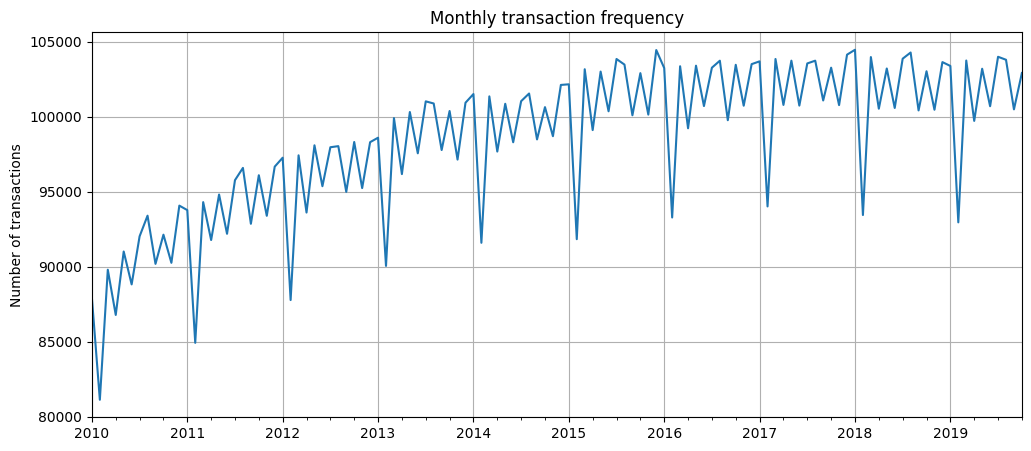

In [50]:
# Create trans_demo from selected trans_cleaned columns (with .copy())
trans_demo = trans_cleaned[['trans_id', 'date', 'client_id', 'card_id', 'amount', 'mcc']].copy()

# Convert date to datetime
trans_demo['date'] = pd.to_datetime(trans_demo['date'])

# Create time-related columns
trans_demo['month'] = trans_demo['date'].dt.to_period('M').dt.to_timestamp()
trans_demo['year'] = trans_demo['date'].dt.year

# Monthly and yearly transaction frequencies
freq_month = trans_demo.groupby('month')['trans_id'].count()
freq_year = trans_demo.groupby('year')['trans_id'].count()

# Plotting
freq_month.plot(figsize=(12, 5), title="Monthly transaction frequency")
plt.ylabel("Number of transactions")
plt.xlabel("")
plt.grid(True)
plt.show()


### 💳 Spending by Brand & Type

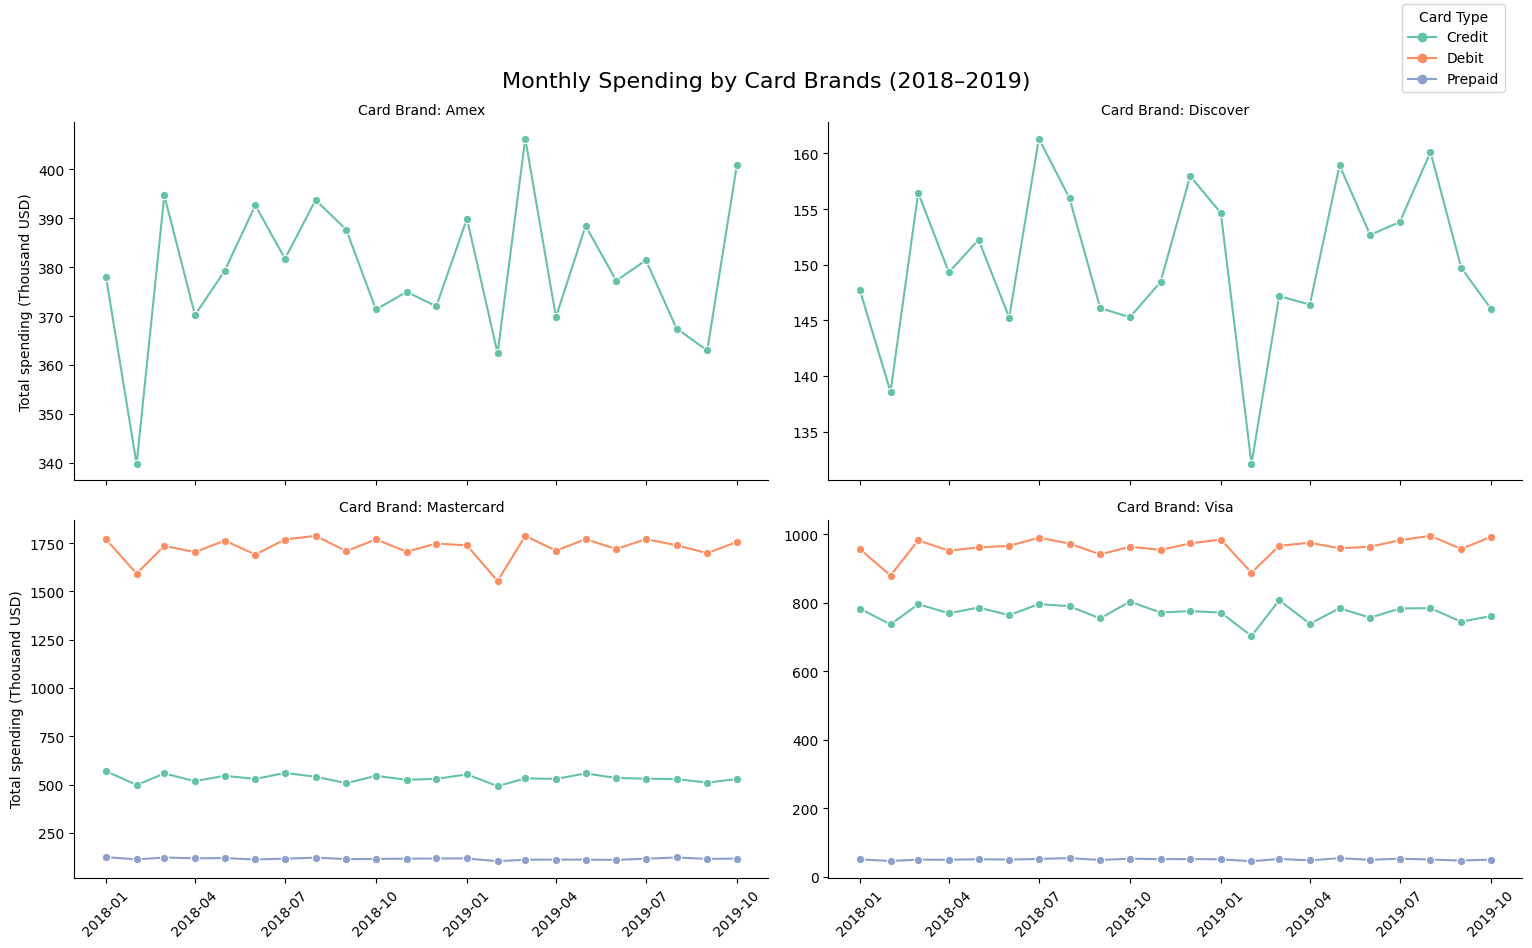

In [51]:
# Merge cards data with tran_demo data
trans_demo = trans_demo.merge(cards[['card_id', 'card_brand', 'card_type', 'credit_limit']], on='card_id', how='left')

# Lọc 2 năm gần nhất
latest_years = sorted(trans_demo['date'].dt.year.unique())[-2:]
trans_2yrs = trans_demo[trans_demo['date'].dt.year.isin(latest_years)]

# Tính tổng chi tiêu theo tháng, card_type và card_brand
monthly_trend = (
    trans_2yrs.groupby(['month', 'card_type', 'card_brand'], observed=True)['amount']
    .sum()
    .reset_index()
)

# Chuyển đơn vị sang NGHÌN USD
monthly_trend['amount'] = monthly_trend['amount'] / 1_000

# Chỉ lấy top 4 thương hiệu phổ biến
top_brands = monthly_trend['card_brand'].value_counts().index[:4]
monthly_trend = monthly_trend[monthly_trend['card_brand'].isin(top_brands)]

# Vẽ biểu đồ với lưới 2 hàng x 2 cột
g = sns.relplot(
    data=monthly_trend,
    x='month', y='amount',
    hue='card_type',
    kind='line',
    marker='o',
    col='card_brand',
    col_wrap=2,
    facet_kws={'sharey': False},
    height=4.5, aspect=1.6,
    palette='Set2'
)

# Ghi nhãn và tiêu đề
g.set_titles("Card Brand: {col_name}")
g.set_axis_labels("", "Total spending (Thousand USD)")
g.fig.suptitle(f"Monthly Spending by Card Brands ({latest_years[0]}–{latest_years[1]})", fontsize=16)
plt.subplots_adjust(top=0.90)

# Đặt legend lên góc trên bên phải
g._legend.set_bbox_to_anchor((0.98, 1))
g._legend.set_frame_on(True)
g._legend.set_title("Card Type")

# Xoay nhãn trục X
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

### 🔍 Key Insides
1- Overall Transactions Frequency
* Upward growth: The number of transactions increased steadily from ~82K/month in 2010 to ~103–105K/month by 2019.
=> This suggests customer base growth or increased transaction activity per user over time.
* Recurring annual dips: There are noticeable drops in transaction counts once a year — likely seasonal effects (e.g., post-holiday spending slowdown or specific low-activity months).
=> The pattern is consistent, indicating predictable low-demand periods.

2- Spending by Card Brand
* Mastercard dominates overall spending, especially debit cards, with monthly spending between 1.6M–1.8M USD and credit cards between 500K–600K USD.
* Visa is second in overall spending, with debit spending around 900K–1M USD and credit spending 750K–800K USD monthly.
* Amex and Discover have much lower volumes (hundreds of thousands USD), indicating niche usage compared to Visa and Mastercard.

3- Card Type Trends
* Debit Cards lead spending for Mastercard and Visa, possibly due to wider acceptance and consumer preference for direct bank withdrawals.
* Credit Cards dominate for Amex and Discover, aligning with their brand positioning.
* Prepaid Cards have minimal spending across all brands, with Mastercard leading slightly in this segment.

4- Stability and Seasonality
* Mastercard and Visa spending patterns are relatively stable, with minor seasonal peaks.
* Amex and Discover show more volatility, with occasional sharp spikes or drops (e.g., Amex spike in early 2019 and Discover dip in early 2019).
* Possible seasonal effects around holiday periods, but not as pronounced for debit as for credit.

5- Market Positioning Implications
* Mastercard and Visa dominate volume and breadth, while Amex and Discover might focus on premium customers and targeted rewards.
* Credit card spending patterns indicate that high-value customers for Amex and Discover might respond well to special offers and reward programs during low months.

### 💡 Recommendations
* Amex & Discover Growth Strategies
 - Target more merchant partnerships to increase acceptance.
 - Run spending incentive campaigns in low months to smooth volatility.
* Mastercard & Visa
 - Leverage debit card dominance to upsell customers to credit products with rewards for higher margins.
 - Use stable transaction base for cross-selling other financial services.
* Prepaid Cards
 - Consider promotions to grow prepaid adoption, especially for unbanked/younger demographics.
* Seasonal Campaigns
 - Capitalize on peaks (e.g., holiday spending) with targeted marketing, especially for credit card customers who are more likely to spend during these times.

## 4.2. Spending by MCC

### 📊 Chart

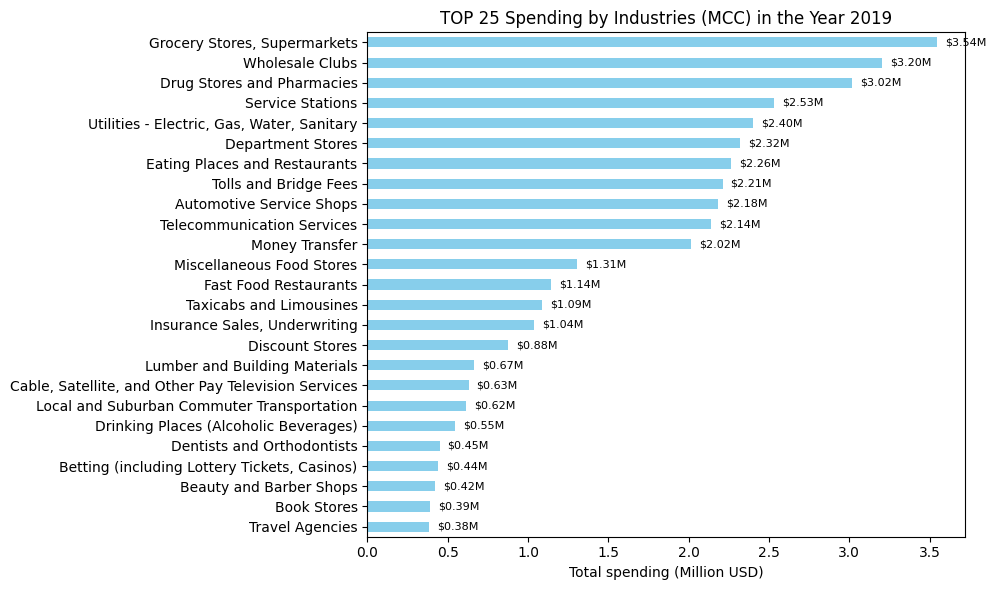

6503

In [52]:
# Lọc dữ liệu giao dịch trong năm gần nhất
trans_mcc = trans_demo.merge(mcc_codes[['mcc', 'description']], on='mcc', how='left')
last_year = trans_mcc['year'].max()
trans_mcc_last_year = trans_mcc[trans_mcc['year'] == last_year]

# Tính tổng chi tiêu theo ngành hàng trong gần nhất (triệu USD)
spending_last_year_by_industry = (
    trans_mcc_last_year.groupby('description')['amount']
    .sum()
    .sort_values(ascending=False) / 1_000_000  # chuyển sang triệu USD
).head(25)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = spending_last_year_by_industry.plot(kind='barh', color='skyblue')
plt.title(f"TOP 25 Spending by Industries (MCC) in the Year {last_year}")
plt.xlabel("Total spending (Million USD)")
plt.ylabel("")

# Thêm giá trị chi tiêu lên biểu đồ
for index, value in enumerate(spending_last_year_by_industry):
    plt.text(value + 0.05, index, f"${value:.2f}M", va='center', fontsize=8)

plt.gca().invert_yaxis()  # Để ngành chi tiêu nhiều nhất nằm trên cùng
plt.tight_layout()
plt.show()

# Remove the unsed dataframe
del trans_mcc
gc.collect()

### 🔍 Key Insides
1- High Spending Sectors
* Grocery Stores, Supermarkets (3.54M USD) and Wholesale Clubs (3.20M USD) are the top categories, indicating essential household and bulk purchases dominate spending.
* Drug Stores and Pharmacies (3.02M USD) highlight significant healthcare-related expenditures.

2- Lifestyle & Daily Needs
* Service Stations (2.53M USD) and Utilities (2.40M USD) show that transportation and essential services are key spending areas.
* Eating Places & Restaurants (2.26M USD) rank high, reflecting strong dining-out culture.

3- Moderate Spending Categories
* Department Stores (2.32M USD) and Tolls & Bridge Fees (2.21M USD) indicate consistent retail and commuting costs.
* Automotive Service Shops (2.18M USD) and Telecommunication Services (2.14M USD) reflect spending on vehicle upkeep and connectivity.

4- Niche but Noticeable Spending
* Betting & Casinos (0.44M USD), Drinking Places (0.55M USD), and Beauty Services (0.42M USD) represent smaller but significant lifestyle expenditures.
* Travel Agencies (0.38M USD) are at the bottom, possibly due to limited travel demand or shift to online bookings.

### 💡 Recommendations
* Retail & Grocery: Consider partnerships or loyalty programs in grocery, wholesale, and pharmacy sectors to tap into the largest consumer spending pools.
* Dining Sector: Offer targeted promotions or rewards in restaurants and fast-food chains to capture share in these high-volume categories.
* Transportation & Utilities: Build bundled offers with service stations, toll systems, and utility providers, as they have recurring demand.
* Lifestyle & Leisure: Encourage cross-promotions in entertainment, beauty, and travel to increase engagement in moderate/low spend categories.
* Digital Payment Expansion: Promote card usage for sectors with lower card penetration like betting, beauty, and local transportation.

## 4.3. Spending by Age

### 📊 Charts

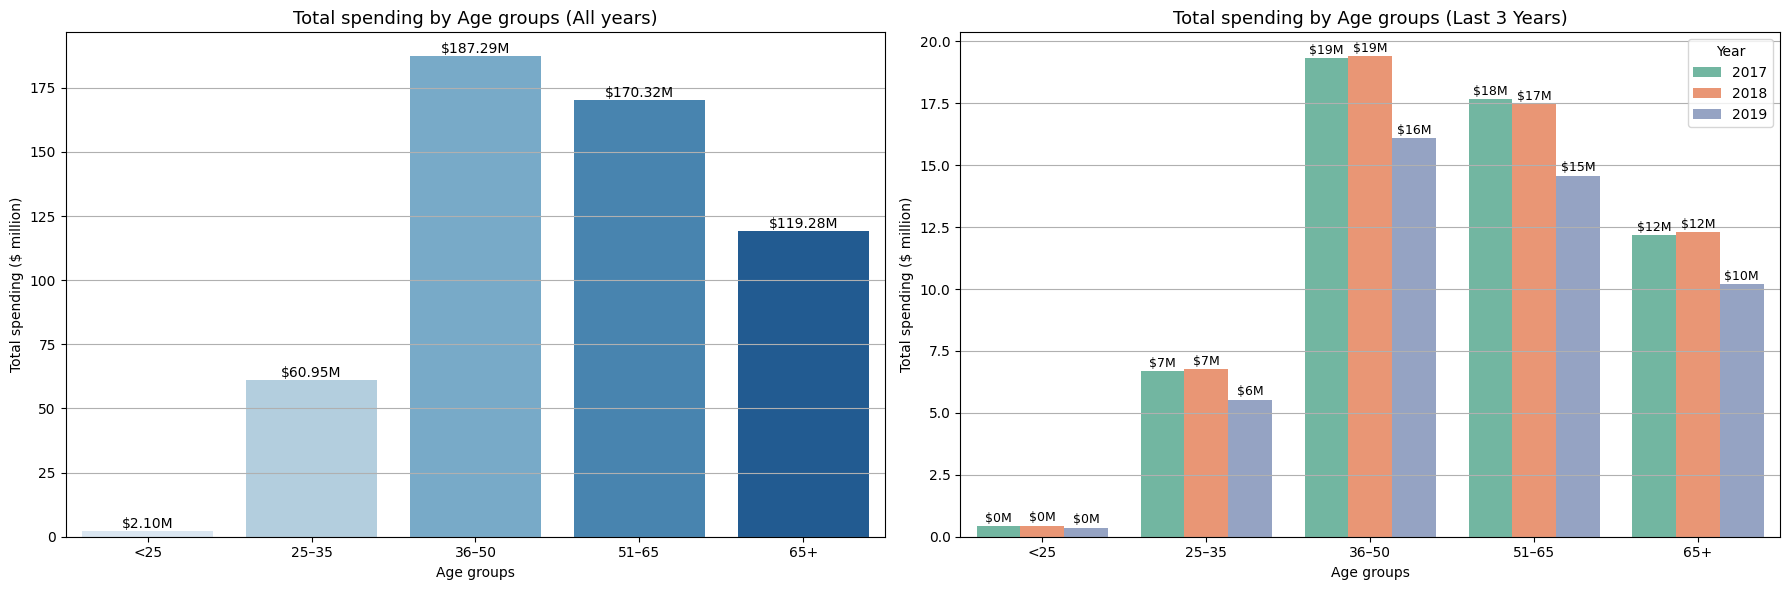

526

In [53]:
# Merge users data with trans_demo data
trans_by_age = trans_demo.merge(
    users[['client_id', 'current_age', 'gender', 'yearly_income', 'credit_score', 'num_credit_cards']],
    on='client_id', how='left')

# Tạo nhóm tuổi
bins = [0, 25, 35, 50, 65, 100]
labels = ['<25', '25–35', '36–50', '51–65', '65+']
trans_by_age['age_group'] = pd.cut(trans_by_age['current_age'], bins=bins, labels=labels)

# Chart 1: Tổng chi tiêu theo nhóm tuổi (tất cả năm)
age_spending = trans_by_age.groupby('age_group', observed=True)['amount'].sum().sort_index()
age_spending_million = age_spending / 1_000_000

# Chart 2: Tổng chi tiêu theo nhóm tuổi trong 3 năm gần nhất
trans_by_age['year'] = trans_by_age['date'].dt.year
latest_3_years = sorted(trans_by_age['year'].dropna().unique())[-3:]
filtered_data = trans_by_age[trans_by_age['year'].isin(latest_3_years)]

age_year_spending = (
    filtered_data.groupby(['year', 'age_group'], observed=True)['amount']
    .sum()
    .reset_index()
)
age_year_spending['amount_million'] = age_year_spending['amount'] / 1_000_000

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart 1
sns.barplot(
    x=age_spending_million.index,
    y=age_spending_million.values,
    ax=ax1,
    hue=age_spending_million.index,   # Fix for future seaborn versions
    palette='Blues',
    legend=False
)
for i, v in enumerate(age_spending_million.values):
    ax1.text(i, v + 0.1, f"${v:.2f}M", ha='center', va='bottom', fontsize=10)
ax1.set_title("Total spending by Age groups (All years)", fontsize=13)
ax1.set_ylabel("Total spending ($ million)")
ax1.set_xlabel("Age groups")
ax1.grid(True, axis='y')

# Chart 2
sns.barplot(
    data=age_year_spending,
    x='age_group',
    y='amount_million',
    hue='year',
    palette='Set2',
    ax=ax2
)
for container in ax2.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax2.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.05,
                f"${height:.0f}M",
                ha='center',
                va='bottom',
                fontsize=9
            )
ax2.set_title("Total spending by Age groups (Last 3 Years)", fontsize=13)
ax2.set_xlabel("Age groups")
ax2.set_ylabel("Total spending ($ million)")
ax2.legend(title="Year")
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

# Remove the unsed dataframe
del trans_by_age
gc.collect()

### 🔍 Key Insides
1. Overall Spending Trends (All Years)
* Highest Spending Group:
 - The 36–50 group leads with 187.29M USD, followed closely by 51–65 group at 170.32M USD.
 - These two age groups together contribute the majority of total spending.

* Moderate Spending:
 - The 65+ group still show strong spending power at $119.28M, indicating continued economic activity among seniors.

* Low Spending:
 - 25–35 group spend much less (60.95M USD), potentially due to early career stages and limited disposable income.
 - <25 group has minimal spending (2.10M USD), likely due to low earnings and dependency on parents.

2- Recent 3-Year Trends (2017–2019)
* Declining Spending Across Groups:
All major age groups (36–50, 51–65, 65+) saw a drop in 2019 compared to 2017–2018, possibly due to economic slowdown or changing consumer behavior.

* 36–50 group:
Steady in 2017–2018 (~$19M each year), but drops to 16M USD in 2019.

* 51–65 group:
Declines from $18M (2017) to 15M USD (2019).

* 65+ group:
Falls from 12M USD to 10M USD over the period, possibly due to reduced fixed income or spending prioritization.

* 25–35 group:
Spending remains small but relatively stable (7M USD → 6M USD).

* <25 group:
Negligible spending in all years.

3- Key Takeaways
* Middle-aged groups (36–65 years) remain the core drivers of total spending.
* Recent downward trend in spending (2019) may indicate economic caution or market saturation in older and middle-aged consumers.
* Younger consumers (<35) represent a potential growth segment if targeted with entry-level or lifestyle-oriented products.
* The 65+ segment, despite decline, is still significant and may respond well to loyalty programs or senior discounts.

### 💡 Recommendations
1- The <25 group – Entry-Level Engagement:
Very low spending (~$2M total, negligible yearly). Likely students or early-career individuals with limited income.
Actions plan:
- Student & Youth Discounts: Offer tiered discounts for first-time customers.
- Lifestyle-focused products: Position products as affordable but trendy (e.g., subscription-based or bundled offers).
- Social Media Engagement: Leverage TikTok, Instagram Reels for brand exposure.
- Gamification & Rewards: Encourage small, frequent transactions with loyalty points.

2- The 25–35 group – Growth Potential:
Stable but small yearly spend (~6M USD – 7M USD).
Actions plan:
- Flexible Financing: Installment plans for high-ticket items.
- Career-Oriented Products: Target with workwear, productivity tools, and home-office essentials.
- Digital Convenience: Push mobile-first services (app payments, contactless cards).
- Travel & Experience Packages: Bundle lifestyle and travel offers for upwardly mobile consumers.

3- The 36–50 group – Core Spending Power:
Highest total spending (187.29M USD), but recent decline from 19M USD to $16M/year.
=> Actions plan:
- Retention Programs: Personalized offers for top spenders to combat spending decline.
- Premium Upselling: Encourage upgrades to higher-value products or services.
- Cross-Selling: Bundle products from top-spending categories (e.g., groceries + utilities).
- Convenience & Time Savings: Emphasize delivery services, subscription replenishments.

4- The 51–65 group – Strong But Declining yearly.
=> Actions plan:
- Health & Wellness Focus: Senior fitness, insurance, preventive care packages.
- Loyalty & Cashback: Appeal to value-conscious spending habits.
- Multi-Channel Support: Ensure easy access via physical branches + digital platforms.
- Trust-based Marketing: Highlight reliability, safety, and long-term guarantees.

5- The 65+ group – Significant but Shrinking.
=> Actions plan:
- Senior-Specific Offers: Discounts, free delivery, and low-complexity product bundles.
- Financial Security Products: Insurance, fixed-return investments, and budgeting tools.
- Community Engagement: Host events, partner with local clubs, and sponsor senior activities.
- Assistive Tech & Services: Simplify user experience with easy-to-use apps, voice assistance.

## 4.4. Spending by Gender

### 📊 Charts

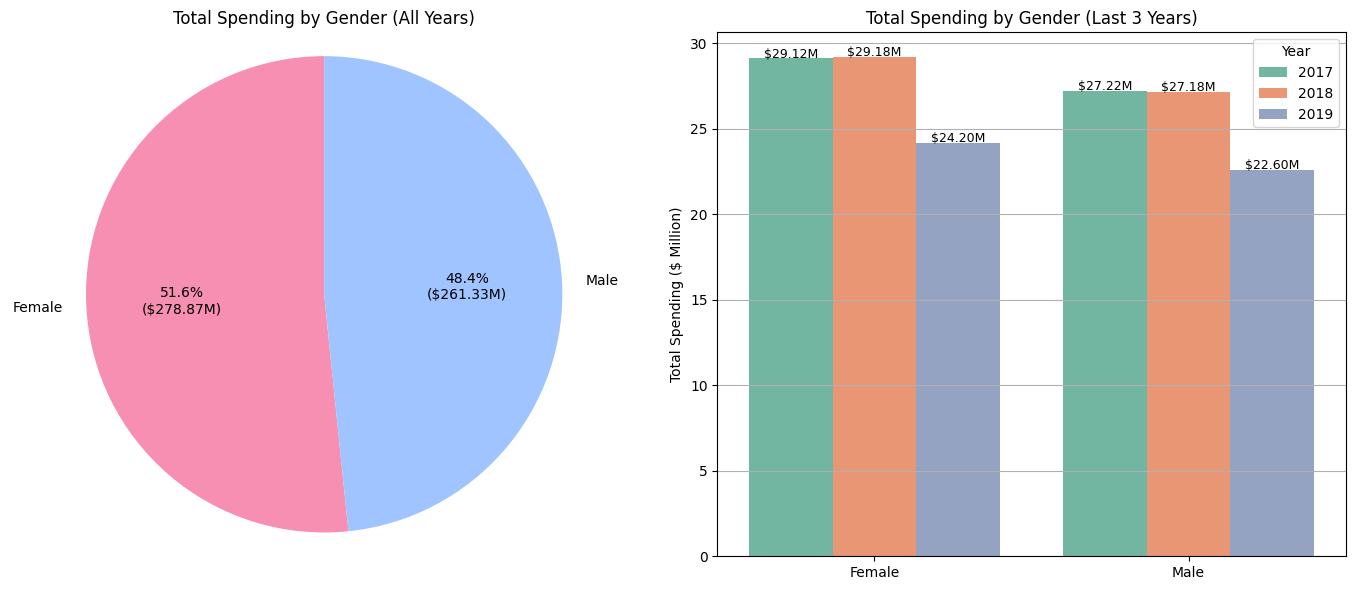

In [54]:
trans_demo = trans_demo.merge(
    users[['client_id', 'current_age', 'gender', 'yearly_income', 'credit_score', 'num_credit_cards']],
    on='client_id', how='left')

# ===== Chart 1: Total purchases by gender (All years) =====
gender_spending = trans_demo.groupby('gender', observed=True)['amount'].sum()
gender_spending_million = gender_spending / 1_000_000

# Define colors (pink for female)
gender_order = gender_spending_million.index.tolist()
colors = []
for gender in gender_order:
    if gender.lower() == 'female':
        colors.append('#F78FB3')  # pink
    elif gender.lower() == 'male':
        colors.append('#A0C4FF')  # light blue
    else:
        colors.append('#D3D3D3')  # grey for other/unknown

# ===== Plot both charts side-by-side =====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Chart 1: Pie chart (All years) ---
axes[0].pie(
    gender_spending_million.values,
    labels=gender_order,
    autopct=lambda p: f'{p:.1f}%\n(${p * gender_spending_million.sum() / 100:.2f}M)',
    startangle=90,
    colors=colors
)
axes[0].axis('equal')
axes[0].set_title("Total Spending by Gender (All Years)")

# ===== Chart 2: Total purchases by gender in last 3 years =====
filtered_gender = trans_demo[trans_demo['year'].isin(latest_3_years)]
gender_year_spending = (
    filtered_gender.groupby(['year', 'gender'], observed=True)['amount']
    .sum()
    .reset_index()
)
gender_year_spending['amount_million'] = gender_year_spending['amount'] / 1_000_000

# --- Chart 2: Last 3 years ---
sns.barplot(
    ax=axes[1],
    data=gender_year_spending,
    x='gender',
    y='amount_million',
    hue='year',
    palette='Set2'
)
axes[1].set_title("Total Spending by Gender (Last 3 Years)")
axes[1].set_ylabel("Total Spending ($ Million)")
axes[1].set_xlabel("")
axes[1].legend(title="Year")
axes[1].grid(axis='y')

# Add annotations to bars
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[1].text(
                bar.get_x() + bar.get_width()/2,
                height + 0.05,
                f"${height:.2f}M",
                ha='center',
                fontsize=9
            )

plt.tight_layout()
plt.show()

### 🔍 Key Insides
1- Overall Spending Patterns (All Years)
* Female customers account for 51.6% of total spending, amounting to 278.87M USD, slightly higher than male customers at 48.4% (261.33M USD).
* The spending gap is relatively small (~$17.54M), indicating a balanced contribution from both genders.
* This balance suggests that both male and female customers are important target segments, and marketing efforts should cater to both equally, with nuanced personalization.

2- Yearly Trends (2017–2019)
* Both genders show a declining trend in spending from 2017 to 2019:
 - Female: From ~29.12M USD in 2017 to ~24.20M USD in 2019 (↓ ~17%).
 - Male: From ~27.22M USD in 2017 to ~$22.60M in 2019 (↓ ~17%).
* The parallel decline suggests that the drop is likely influenced by external market factors (economic slowdown, changes in payment trends, competition) rather than gender-specific behavior.



### 💡 Recommendations
1- Targeted Marketing Campaigns
* For Female Customers
 - Leverage top-spending categories they are more active in (e.g., groceries, department stores, personal care).
 - Offer exclusive loyalty perks, seasonal sales, and bundled discounts with popular retail brands.
* For Male Customers
 - Focus on high-value sectors like automotive, electronics, and travel.
 - Promote offers such as cashback on fuel, tech gadget discounts, and holiday packages.

2- Reignite Declining Spending
* Both genders show ~17% decline in spending from 2017 to 2019.
* Implement limited-time “spend and earn” campaigns (e.g., extra reward points for purchases in targeted categories).
* Introduce tiered reward levels where higher spending unlocks premium benefits (VIP events, early product access).

3- Cross-Selling and Household Bundles
* Since spending is almost balanced between genders, develop joint offers:
 - Couple’s dining rewards.
 - Family travel packages.
 - Household subscription bundles (telephone, internet, cable TV, etc.).

4- Data-Driven Personalization
* Use transaction history to segment by purchase frequency, average ticket size, and preferred categories.
* Deliver personalized email/SMS promotions with category-specific coupons.

5- Customer Feedback and Insights
* Run gender-specific surveys to understand motivators for spending and causes of decline.
* Use feedback to adjust offers, product mix, and merchant partnerships.

## 4.5. Spending by Income

### 📊 Charts

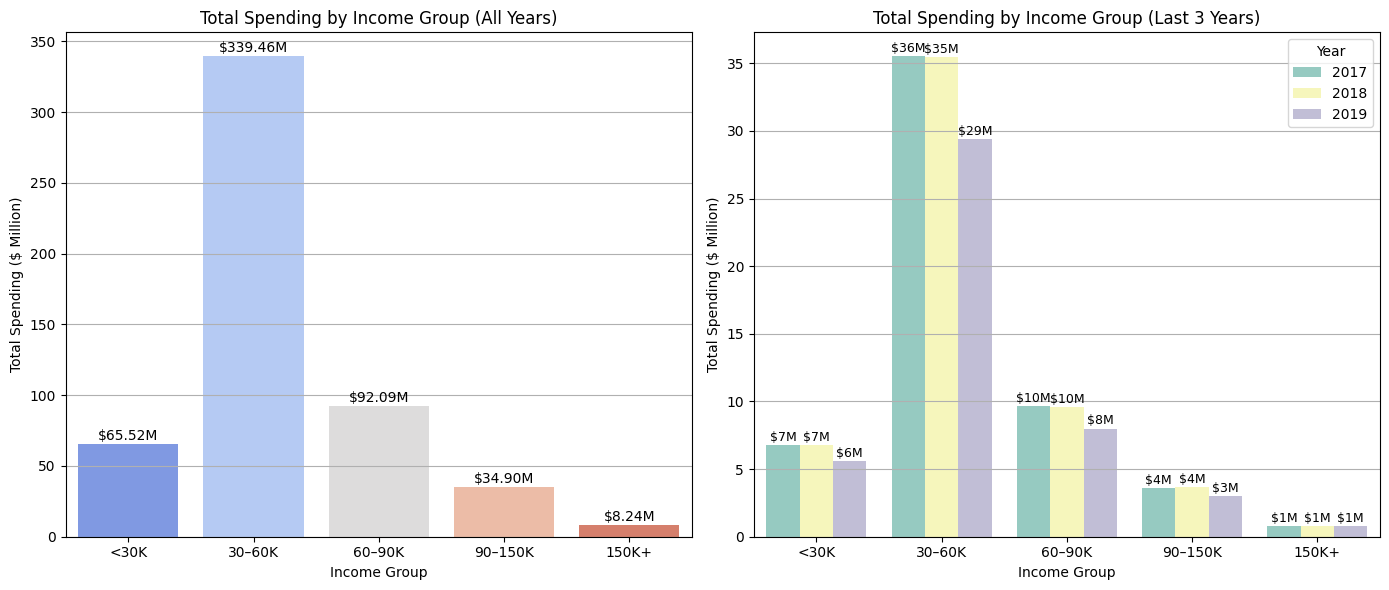

In [55]:
# Create income bins (adjust as appropriate for your data)
income_bins = [0, 30000, 60000, 90000, 150000, float('inf')]
income_labels = ['<30K', '30–60K', '60–90K', '90–150K', '150K+']
trans_demo['income_group'] = pd.cut(trans_demo['yearly_income'], bins=income_bins, labels=income_labels)

# ===== Chart 1: Total purchases by income (All years) =====
income_spending = trans_demo.groupby('income_group', observed=True)['amount'].sum()
income_spending_million = income_spending / 1_000_000

# ===== Chart 2: Total purchases by income in last 3 years =====
filtered_income = trans_demo[trans_demo['year'].isin(latest_3_years)]
income_year_spending = (
    filtered_income.groupby(['year', 'income_group'], observed=True)['amount']
    .sum()
    .reset_index()
)
income_year_spending['amount_million'] = income_year_spending['amount'] / 1_000_000

# ===== Plot both charts side-by-side =====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: All years
sns.barplot(
    ax=axes[0],
    x=income_spending_million.index,
    y=income_spending_million.values,
    hue=income_spending_million.index,  # to suppress seaborn palette warning
    palette='coolwarm',
    legend=False
)
axes[0].set_title("Total Spending by Income Group (All Years)")
axes[0].set_ylabel("Total Spending ($ Million)")
axes[0].set_xlabel("Income Group")
axes[0].grid(axis='y')
for i, v in enumerate(income_spending_million.values):
    axes[0].text(i, v + 3, f"${v:.2f}M", ha='center', fontsize=10)

# Chart 2: Last 3 years
sns.barplot(
    ax=axes[1],
    data=income_year_spending,
    x='income_group',
    y='amount_million',
    hue='year',
    palette='Set3'
)
axes[1].set_title("Total Spending by Income Group (Last 3 Years)")
axes[1].set_ylabel("Total Spending ($ Million)")
axes[1].set_xlabel("Income Group")
axes[1].legend(title="Year")
axes[1].grid(axis='y')
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[1].text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.3,
                f"${height:.0f}M",
                ha='center',
                fontsize=9
            )

plt.tight_layout()
plt.show()

### 🔍 Key Insides

📊 Chart 1: Overall Spending Trends (All Years)
* The 30–60K income group is the dominant spender, contributing 339.46M USD, far surpassing all other income segments.
* The 60–90K group follows with 92.09M USD, showing significantly less but still notable spending.
* The <30K segment contributes 65.52M USD, indicating moderate activity despite lower income.
* Higher-income groups (90–150K: 34.90M USD, 150K+: $8.24M) contribute the least, showing a sharp drop-off in spending from wealthier individuals.

📊 Chart 2: Yearly Trends (Last 3 Years)
* Across all income groups, there is a slight decline in spending from 2017 to 2019.
 - The 30–60K group: From ~36M USD in 2017 and ~35M USD in 2018 to ~29M USD in 2019.
 - The 60–90K group: From ~10M USD in 2017 to ~8M USD in 2019.
 - The <30K group: Gradual decline from ~7M USD to ~6M USD.
* Higher-income groups (90–150K, 150K+) maintain relatively flat but low spending levels.

=> Key Observations
* Middle-income dominance: The 30–60K group is the main driver of total spending, indicating that mid-income consumers are the core target segment.
* High-income underperformance: The 90–150K and 150K+ groups have very low spending, suggesting either different spending patterns (possibly more on non-captured categories) or a lack of targeted marketing toward them.
* Downward trend: All income groups experienced a mild spending decline over the last three years, possibly due to economic conditions, shifting consumer preferences, or competitive market factors.

### 💡 Recommendations
1- Focus Marketing on the 30–60K Income Group
* This segment is the core revenue driver ($339.46M total) and should remain the primary target for promotions and loyalty programs.
* Tailor offers to appeal to their value-for-money mindset: bundles, seasonal discounts, and loyalty perks.
* Use personalized digital ads and social media campaigns to maintain engagement and prevent the recent spending decline.

2- Unlock Potential in the 60–90K Income Group
* With $92.09M in total spending, this group is the second largest contributor but has shown decline in the last three years.
* Offer premium product lines or upselling options—this income bracket may respond well to “affordable luxury” positioning.
* Launch tiered membership benefits (e.g., early access to products) to increase their annual spending.

3- Re-engage the <30K Income Group with Affordable Offerings
* Even with lower income, they contribute $65.52M—suggesting they are still an important segment.
* Provide low-cost entry-level products, micro-promotions, and installment payment options to encourage repeat purchases.
* Utilize influencer partnerships to reach this group on platforms like TikTok and Instagram.

4- Explore the Untapped High-Income Segments (90K–150K & 150K+)
* Current spending is disproportionately low to their earning potential—just $43.14M combined.
* Introduce exclusive, high-end product lines, invite-only events, and VIP service experiences.
* Use targeted luxury branding and personalized concierge outreach to increase engagement.

5- Counter the Declining Spending Trend (2017–2019)
* Introduce loyalty revival campaigns to bring back dormant customers.
* Offer limited-time seasonal promotions that drive urgency.
* Monitor spending patterns with customer segmentation analytics to react faster to changes in demand.

## 4.6. Spending by Credit Score

### 📊 Charts

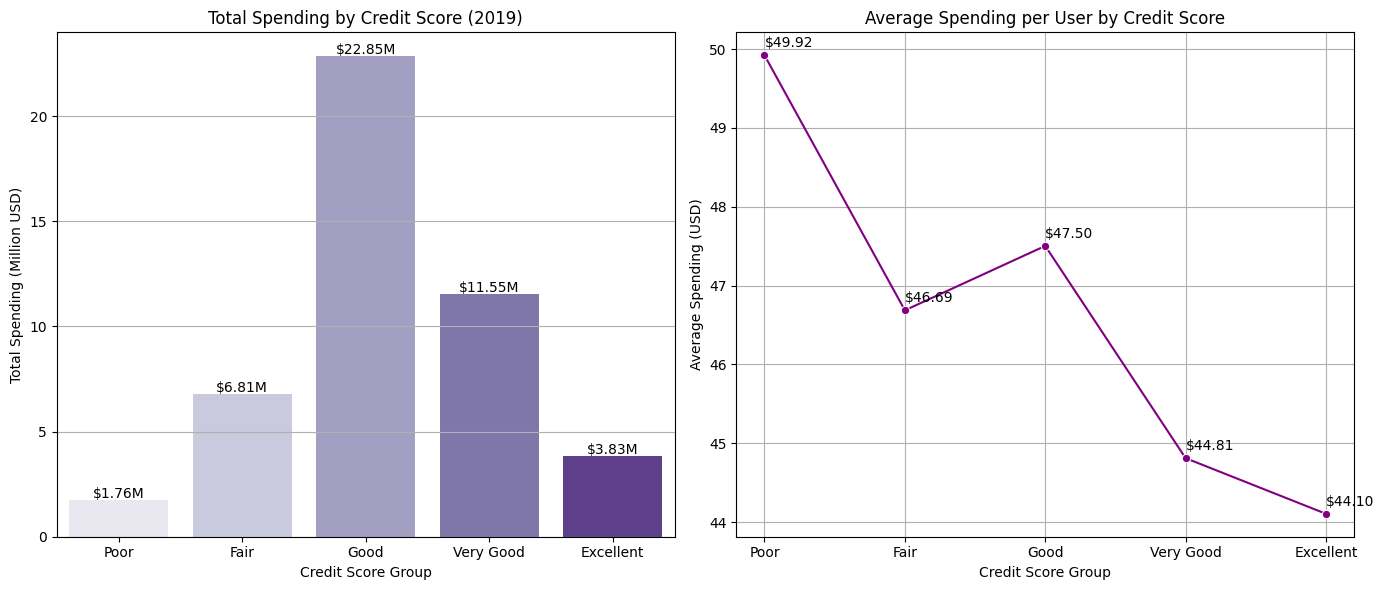

In [56]:
# === Prepare data ===
score_bins = [0, 580, 670, 740, 800, 850]
score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
trans_demo['score_group'] = pd.cut(
    trans_demo['credit_score'],
    bins=score_bins,
    labels=score_labels
)

last_year = trans_demo['year'].max()
trans_last_year = trans_demo[trans_demo['year'] == last_year]

# 1. Total spending by score group in last year (in million USD)
score_spending_total = (
    trans_last_year.groupby('score_group', observed=True)['amount']
    .sum()
    .reindex(score_labels) / 1_000_000
)

# 2. Mean spending per user by score group (all years)
score_spending_avg = (
    trans_demo.groupby('score_group', observed=True)['amount']
    .mean()
    .reindex(score_labels)
)

# === Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Total Spending (Last Year)
sns.barplot(
    ax=axes[0],
    x=score_spending_total.index,
    y=score_spending_total.values,
    hue=score_spending_total.index,  # fix palette warning
    palette='Purples',
    legend=False
)
axes[0].set_title(f"Total Spending by Credit Score ({last_year})")
axes[0].set_ylabel("Total Spending (Million USD)")
axes[0].set_xlabel("Credit Score Group")
axes[0].grid(axis='y')

# Add value labels
for i, v in enumerate(score_spending_total.values):
    axes[0].text(i, v + 0.1, f"${v:,.2f}M", ha='center', fontsize=10)

# Chart 2: Average Spending (All Years)
sns.lineplot(
    ax=axes[1],
    x=score_spending_avg.index,
    y=score_spending_avg.values,
    marker='o',
    color='purple'
)
axes[1].set_title("Average Spending per User by Credit Score")
axes[1].set_xlabel("Credit Score Group")
axes[1].set_ylabel("Average Spending (USD)")
axes[1].grid(True)

# Add value labels
for i, v in enumerate(score_spending_avg.values):
    axes[1].text(i, v + 0.1, f"${v:,.2f}", ha='left', fontsize=10)

plt.tight_layout()
plt.show()


### 🔍 Key Insides
📊 Chart 1: Total Spending by Credit Score (2019)
- Highest Spending Group: Customers with Good credit scores account for the largest share of spending (22.85M USD).
- Moderate Spending: The Very Good group contributes $11.55M, showing strong purchasing power but still lower than the "Good" group.
- Lower Spending: Both Fair (6.81M USD) and Excellent (3.83M USD) groups spend less in total.
- Least Spending: Customers with Poor credit scores contribute only 1.76M USD, indicating minimal activity.

=> Customers with Good credit scores (not the highest scores) are the most active spenders overall. The "Excellent" group contributes much less, likely due to more conservative spending or better financial discipline.

📊 Chart 2: Average Spending per User by Credit Score
- Highest Average Spend per User:
Surprisingly, the Poor credit score group has the highest per-user average spending (49.92 USD).
- Fair & Good Scores: These groups are in the middle range, averaging around 46–47 USD per user.
- Lower Average in Higher Scores: The Very Good (44.81 USD) and Excellent ($44.10) groups spend less per user.

=> Customers with lower credit scores tend to spend more per user, possibly due to reliance on credit for daily needs or lower financial discipline.
Meanwhile, high-score customers (Excellent) are more cautious, spending less per user even if they have higher financial capacity.

✅ Overall Takeaways
- The "Good" credit score group is the largest driver of total spending and should be prioritized for growth strategies.
- The "Poor" credit score group, though small in volume, shows highest average spending per person—but carries higher risk.
- Excellent score customers are stable but conservative, likely using cards more for control and benefits rather than heavy spending.

### 💡 Recommendations
1- Poor Credit Score Group
- Introduce secured credit card products with limited credit lines to reduce risk while capturing spending.
- Offer financial literacy programs or budgeting tools to help them manage credit better.
- Use incentives for on-time payments (cashback or small rewards) to encourage repayment discipline.
- Closely monitor risk using tighter underwriting, but keep them engaged since they spend actively.

2- Fair Credit Score Group
- Provide credit-building products (e.g., low-interest installment plans, small personal loans).
- Offer tiered rewards programs—they are likely to respond positively to motivation for upgrading their credit usage.
- Nudge them towards better credit management with reminders and credit score tracking tools.

3- Good Credit Score Group
- Make this group a priority for loyalty and retention programs (e.g., premium rewards cards, partnerships with retailers).
- Promote higher-value products like co-branded credit cards, travel cards, or insurance add-ons.
- Offer exclusive perks (e.g., airport lounge access, cashback multipliers) to keep them loyal and engaged.
- Cross-sell investment and savings products since they show strong activity and stable spending patterns.

4- Very Good Credit Score Group
- Target them with premium services—low-interest loans, mortgage products, and wealth management.
- Offer personalized rewards to encourage them to shift more of their discretionary spending onto your platform.
- Build trust-based retention strategies (e.g., free annual credit reports, financial advisory support).

5- Excellent Credit Score Group
- Attract with status-driven products (elite cards with luxury benefits, concierge services).
- Cross-sell long-term financial products (investments, insurance, retirement planning).
- Encourage them to use cards for recurring expenses (subscriptions, utilities) rather than big discretionary spends.
- Position products as lifestyle enhancers rather than financial tools (since they don’t rely heavily on credit).

=> Strategic Focus:
- Short-term growth: Double down on the Good score group (highest total spenders).
- Medium-term growth: Gradually upgrade Fair → Good users through incentives.
- Risk-controlled growth: Engage Poor score users but with secured products and education.
- Profitability & retention: Focus on Very Good & Excellent users with premium, status-driven offers.

## 4.7. Spending by Number of Cards

### 📊 Charts

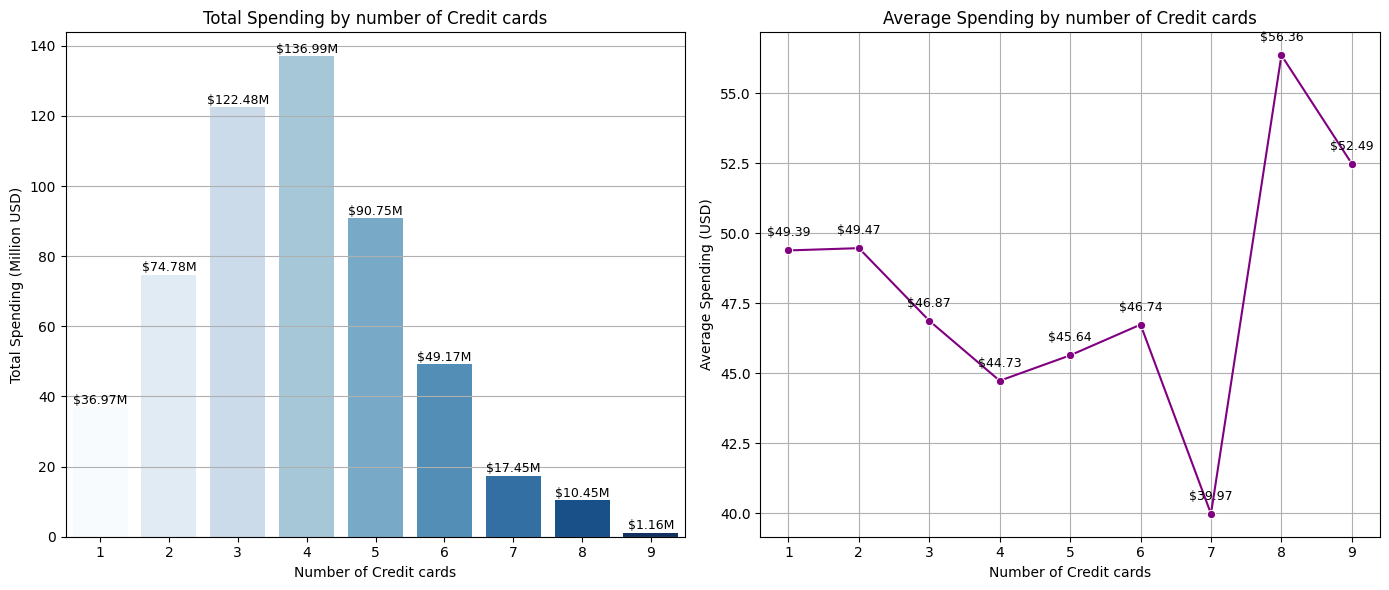

In [57]:
# Grouping: Average and Total Spending
card_avg_spending = trans_demo.groupby('num_credit_cards')['amount'].mean()
card_total_spending = trans_demo.groupby('num_credit_cards')['amount'].sum() / 1_000_000  # In million USD

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Total Spending (Sửa lỗi palette-hue)
sns.barplot(
    ax=axes[0],
    x=card_total_spending.index,
    y=card_total_spending.values,
    hue=card_total_spending.index,   # thêm hue
    palette='Blues',
    legend=False                     # tránh legend trùng lặp
)
axes[0].set_title("Total Spending by number of Credit cards")
axes[0].set_xlabel("Number of Credit cards")
axes[0].set_ylabel("Total Spending (Million USD)")
for i, v in enumerate(card_total_spending.values):
    axes[0].text(i, v + 1, f"${v:,.2f}M", ha='center', fontsize=9)
axes[0].grid(axis='y')


# Chart 2: Average Spending
sns.lineplot(ax=axes[1], x=card_avg_spending.index, y=card_avg_spending.values, marker='o', color='purple')
axes[1].set_title("Average Spending by number of Credit cards")
axes[1].set_xlabel("Number of Credit cards")
axes[1].set_ylabel("Average Spending (USD)")
axes[1].grid(True)

# Add value labels to line plot
for x, y in zip(card_avg_spending.index, card_avg_spending.values):
    axes[1].text(x, y + 0.5, f"${y:,.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### 🔍 Key Insides
1- Total Spending Peaks at 4 Cards
* Customers with 4 credit cards spent the most overall (136.99M USD), followed by those with 3 cards (122.48M USD) and 5 cards (90.75M USD).
* Spending decreases significantly after 5 cards, with a steep drop from 6 cards onward (e.g., only $17.45M for 7 cards).

2- One and Two Cards Segment Still Strong
* Customers with just 1 card already spent 36.97M USD, and those with 2 cards doubled that at $74.78M.
* This indicates a natural increase in spending as card ownership grows, up to 4 cards.

3- Average Spending per User is Not Linear
* Users with 1–2 cards have the highest average spending per person (~49.39 USD – 49.47 USD).
* From 3 to 7 cards, average spending per user declines (bottoming at 39.97 USD for 7 cards).
* Interestingly, customers with 8–9 cards show a rebound in average spending (56.36 USD and 52.49 USD), though total spending is low due to fewer users.

4- Heavy Multi-Card Users Are Few but Valuable
* The 8-card holders segment, while small, has the highest per-user spending, indicating they could be premium customers despite their low volume.

=> Business Implications
* Sweet Spot: 3–4 Cards → These customers generate the highest total revenue and should be nurtured with exclusive multi-card benefits.
* Retention Risk: 6–7 Cards Segment → Their per-user spending drops significantly, suggesting possible credit fatigue or inactive cards.
* High Value: 8–9 Cards Holders → Although small in number, they are big spenders individually and could be targeted with VIP/premium programs.
* Entry-Level Growth: 1–2 Cards → Customers here already spend well; pushing them to take a second or third card can increase total revenue.

### 💡 Recommendations
1- Segment of 1–2 Credit Cards (Entry-Level Customers):
Solid spending per user (~$49), strong growth potential.
Actions plan:
* Cross-Sell More Cards: Introduce tailored offers encouraging customers to add a second card (e.g., cashback for groceries or travel perks).
* Bundled Offers: Provide “dual card packages” (e.g., basic + premium) to maximize utility.
* Financial Education: Campaigns that highlight the benefits of holding multiple cards responsibly.

2- Segment of 3–4 Credit Cards (High-Revenue Core Segment):
Highest total spending, sweet spot for revenue generation.
Actions plan:
* Loyalty Enhancements: Introduce tiered rewards (e.g., Platinum tier) for customers holding 3+ cards.
* Exclusive Partnerships: Collaborate with airlines, retail, or digital platforms to keep them actively using all cards.
* Spend Consolidation Tools: Provide dashboards or apps that help track rewards/benefits across cards, ensuring higher engagement.

3- Segment of 5–7 Credit Cards (Declining Value Segment):
Total spending drops, per-user spending decreases (down to $39 for 7 cards). Risk of card inactivity.
Actions plan:
* Reactivation Campaigns: Target with “Use it or Lose it” promotions (e.g., bonus points for reactivating idle cards).
* Card Rationalization: Encourage consolidating cards into fewer but higher-limit/premium options.
* Personalized Alerts: Send usage reminders and highlight unused rewards to boost engagement.

4- Segment of 8–9 Credit Cards (Niche Premium Segment):
Small group but highest per-user spenders (~$56 average). Likely affluent/power users.
Actions plan:
* VIP Programs: Create “Elite Cardholder Clubs” with concierge services, exclusive travel perks, and invitations to events.
* High-End Partnerships: Luxury brands, investment services, and premium travel packages targeted at this group.
* Credit Line Expansion: Offer higher credit limits and investment-linked benefits.

5- General Strategic Moves
* Data-Driven Personalization: Use customer transaction patterns to tailor offers by card type and segment.
* Gamification of Rewards: Encourage spending across multiple cards with milestone-based rewards.
* Churn Prevention: Identify inactive cardholders early and provide retention offers (fee waivers, bonus points).


## 4.8. Spending by Credit Limit

### 📊 Charts

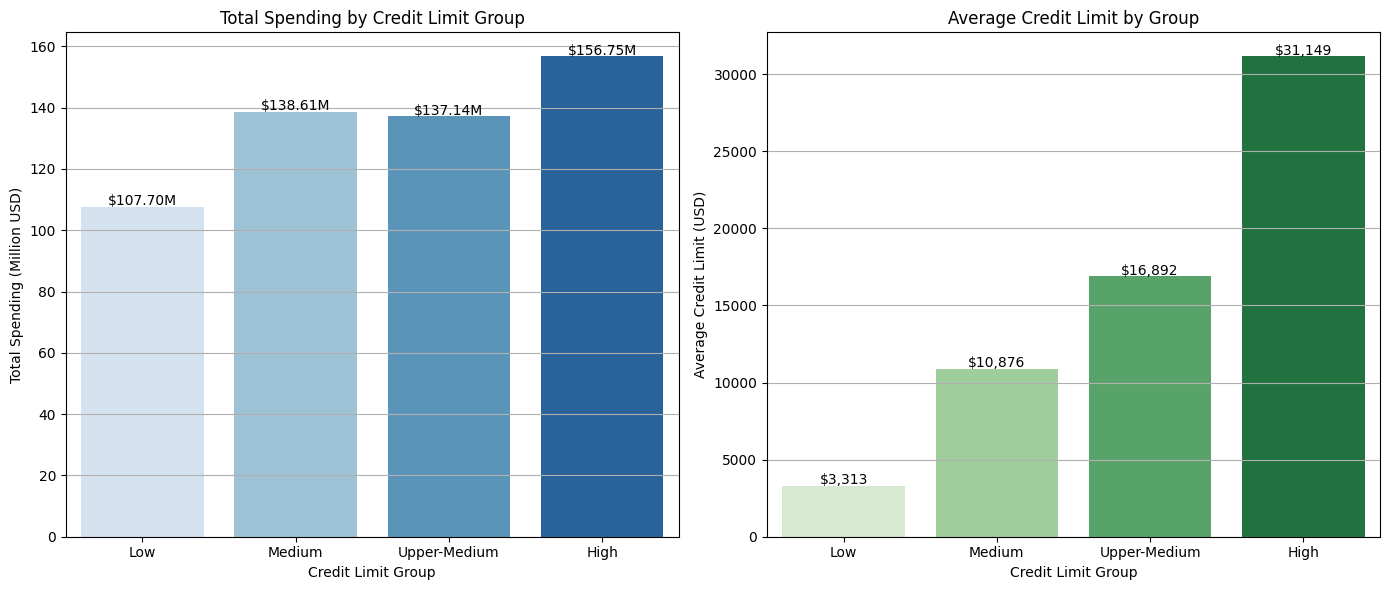

In [58]:
# Chia thành các phân vị hạn mức
trans_demo['limit_group'] = pd.qcut(
    trans_demo['credit_limit'],
    4,
    labels=["Low", "Medium", "Upper-Medium", "High"]
)

# Tổng chi tiêu theo nhóm hạn mức (triệu)
spending_by_limit = (
    trans_demo.groupby('limit_group', observed=True)['amount']
    .sum() / 1_000_000
)

# Trung bình hạn mức theo nhóm
avg_limit_by_group = (
    trans_demo.groupby('limit_group', observed=True)['credit_limit']
    .mean()
)

# Vẽ biểu đồ trong 1 hàng 2 cột
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Tổng chi tiêu theo nhóm hạn mức
sns.barplot(
    ax=axes[0],
    x=spending_by_limit.index,
    y=spending_by_limit.values,
    hue=spending_by_limit.index,
    palette='Blues',
    legend=False
)
axes[0].set_title("Total Spending by Credit Limit Group")
axes[0].set_ylabel("Total Spending (Million USD)")
axes[0].set_xlabel("Credit Limit Group")
axes[0].grid(axis='y')

# Gắn nhãn giá trị lên cột
for i, v in enumerate(spending_by_limit.values):
    axes[0].text(i, v + 0.5, f"${v:.2f}M", ha='center', fontsize=10)

# Biểu đồ 2: Trung bình hạn mức
sns.barplot(
    ax=axes[1],
    x=avg_limit_by_group.index,
    y=avg_limit_by_group.values,
    hue=avg_limit_by_group.index,
    palette='Greens',
    legend=False
)
axes[1].set_title("Average Credit Limit by Group")
axes[1].set_ylabel("Average Credit Limit (USD)")
axes[1].set_xlabel("Credit Limit Group")
axes[1].grid(axis='y')

# Gắn nhãn giá trị lên cột
for i, v in enumerate(avg_limit_by_group.values):
    axes[1].text(i, v + 100, f"${v:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### 🔍 Key Insides
📊 Chart 1: Total Spending
* High credit limit group contributes the highest spending (156.75M USD), confirming that greater access to credit translates to higher usage.
* Medium (138.61M USD) and Upper-Medium (137.14M USD) groups are almost equal, meaning customers with mid-range limits are spending nearly as much as those with higher limits.
* Low credit limit group still contributes a significant $107.70M, showing that even low-limit customers are active spenders.

📊 Chart 2: Average Credit Limit
* Low group: ~3.3K USD credit limit, still spending over $100M in total — this indicates high utilization rates.
* Medium group: ~10.9K USD limit, spending ~138M USD. Balanced growth group.
* Upper-Medium group: ~16.9K USD limit, spending ~137M USD, which is slightly lower than medium despite higher limits → suggests under-utilization.
* High group: ~31.1K USD limit, spending the most (156.75M USD), but their spending does not scale linearly with the large credit available → potential headroom for more growth.


### 💡 Recommendations
1- Low Credit Limit Group (Avg. Limit: 3.3K USD, Spending $107.7M)

✅ Opportunities
* They are high utilizers of their small limits.
* Strong potential for credit line increase offers to boost loyalty and spending.

⚡ Actions plan
* Offer small, controlled credit line increases to reduce churn risk.
* Introduce basic rewards or cashback programs to encourage retention.
* Provide financial education & credit improvement tools, positioning the bank as a partner.

2- Medium Credit Limit Group (Avg. Limit: 10.9K USD, Spending $138.6M)

✅ Opportunities
* Balanced segment with strong contributions.
* Spending is near saturation at current credit limits.

⚡ Actions plan
* Launch tiered rewards (e.g., higher cashback on groceries/restaurants) to push incremental spending.
* Encourage cross-product adoption (loans, insurance, investment products).
* Target with personalized offers (travel, lifestyle perks).

3- Upper-Medium Credit Limit Group (Avg. Limit: 16.9K USD, Spending $137.1M)

⚠️ Challenge
* Despite higher limits, they spend almost the same as Medium group → under-utilization.

⚡ Actions plan
* Conduct spending behavior analysis (are they conservative or using competitor cards?).
* Offer exclusive experiences (travel, dining, premium services) to increase card preference.
* Provide “spend more, earn more” reward accelerators to unlock higher-tier benefits.

4- High Credit Limit Group (Avg. Limit: 31.1K USD, Spending $156.8M)

✅ Opportunities
* They are the biggest contributors in total spending but far from maxing out limits.
* Represents wealthier, low-risk customers.

⚡ Actions plan
* Push premium products (black cards, concierge services, international perks).
* Introduce exclusive investment or wealth management tie-ins.
* Strengthen loyalty with VIP-only events, luxury partnerships, and tailored credit offers.

=> Strategic Moves
* Expand credit for Low/Medium groups → nurture growth and loyalty.
* Re-engage Upper-Medium group → prevent migration to competitors.
* Monetize High group → deepen relationships with premium lifestyle perks and cross-sell wealth products.

## 4.9. Main Variables Correlations

### 📊 Chart

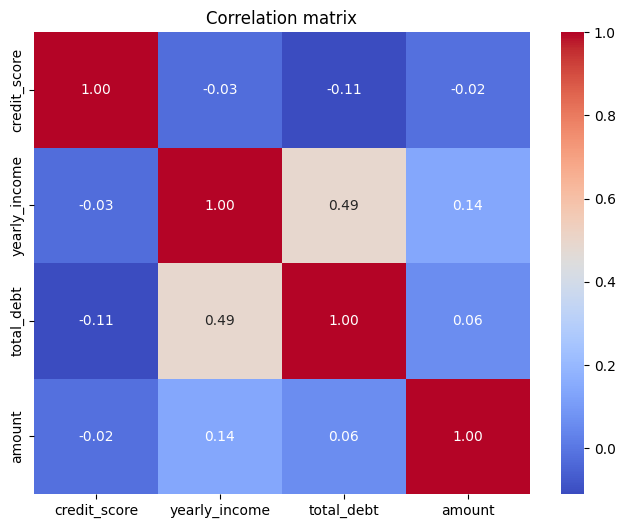

In [59]:
trans_demo = trans_demo.merge(
    users[['client_id', 'total_debt']],
    on='client_id', how='left')

# Chọn các cột liên quan
corr_df = trans_demo[['credit_score', 'yearly_income', 'total_debt', 'amount']]

# Tính ma trận tương quan
correlation_matrix = corr_df.corr()

# Hiển thị heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()


### 🔍 Key Insides

| Variables in Pair               | Correlation | Strength   | Quick Takeaway                                  |
| ------------------------------- | ----------- | ---------- | ----------------------------------------------- |
| credit\_score vs yearly\_income | -0.03       | Negligible | Credit score is not related to yearly income    |
| credit\_score vs total\_debt    | -0.11       | Weak       | More debt slightly lowers credit score          |
| credit\_score vs amount         | -0.02       | Negligible | Spending not linked to credit score             |
| yearly\_income vs total\_debt   | 0.49        | Moderate   | Higher income is moderately linked to more debt |
| yearly\_income vs amount        | 0.14        | Weak       | Higher income → slightly more spending          |
| total\_debt vs amount           | 0.06        | Negligible | Debt level has almost no link to spending       |


### 💡 Recommendations

1. **Credit score is not related to income or spending**
   → Don’t rely on income or spending level to predict credit score. Instead, focus on repayment history and on-time payments when building credit scoring models.

2. **Higher debt slightly lowers credit score**
   → Encourage customers to manage debt responsibly. Consider introducing debt restructuring products (e.g., consolidation loans) or offering incentives for on-time repayment to improve credit scores.

3. **Higher income is moderately linked to higher debt (0.49 correlation)**
   → High-income customers tend to borrow more. This segment is attractive for premium credit products (e.g., Platinum cards, low-interest loan packages). However, risk management is essential as debt levels also rise.

4. **Higher income → slightly higher spending (weak correlation 0.14)**
   → High-income customers may spend more, but not significantly. Focus on personalized offers and luxury services instead of assuming all high-income customers are heavy spenders.

5. **Debt level has almost no link to spending**
   → Spending behavior is mostly independent of debt. Promotional programs such as cashback, loyalty points, and vouchers can be applied broadly across customer segments.

👉 **In summary**:

* Manage risk and help debt-heavy customers improve their credit score.
* Target high-income customers with premium financial products.
* Keep running broad spending incentive programs since spending is not strongly tied to debt.


## 4.10 Customers Cluster Analysis

### 📈 Clusters by Ebowl Method

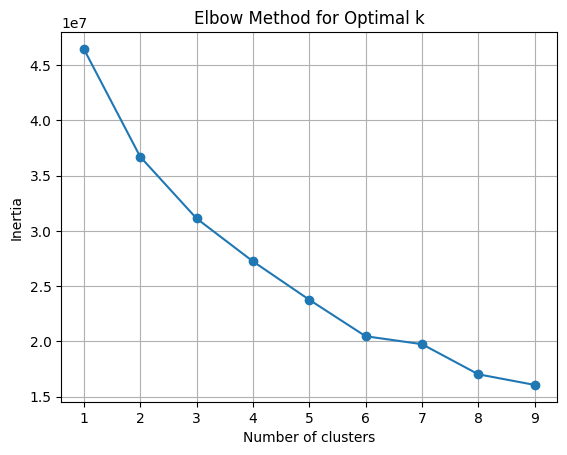

In [60]:
###### Chuẩn bị dữ liệu ######
from sklearn.preprocessing import StandardScaler

# Chọn các biến cần phân cụm:
features = ['credit_score', 'yearly_income', 'total_debt', 'amount']
X = trans_demo[features].dropna() # Drop missing values (if any)

# Chuẩn hóa dữ liệu để các biến có cùng đơn vị | Normalize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#################################################################
#                      K-Means Clustering                       #
# Choose the Number of Clusters (using the Elbow Method)        #
# notice that it's a time consumming process of several minutes #
#################################################################
from sklearn.cluster import KMeans

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### 📊 K-mean Segmentations

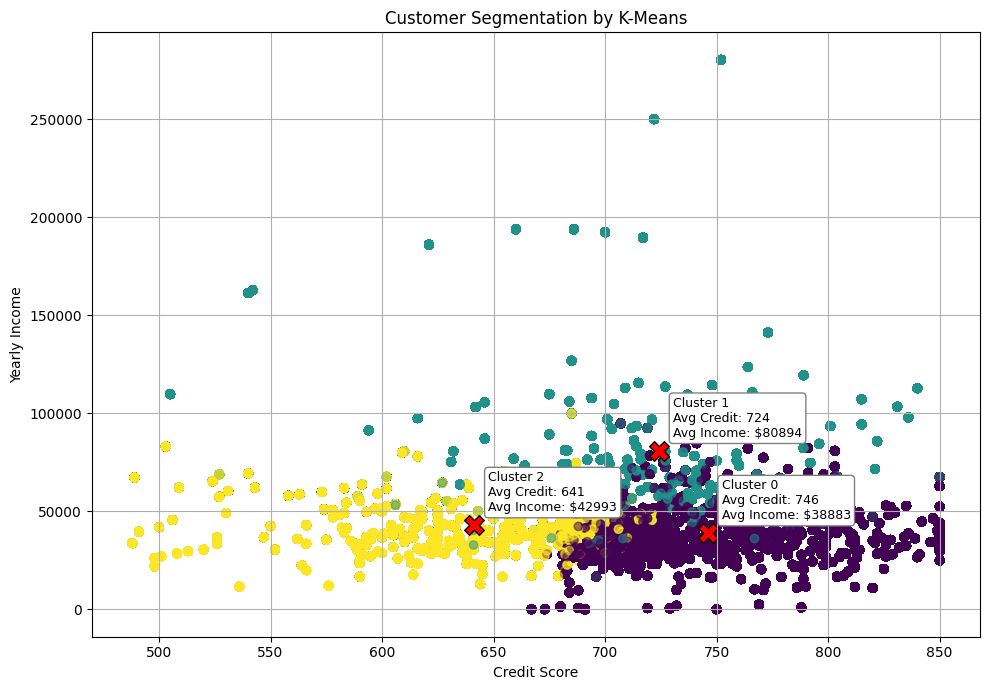

In [61]:
# ###################################################### #
# It could be taken upto 5 minutes to finish the process #
# ###################################################### #

# Fit KMeans (with number of clusters = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
trans_demo['cluster'] = kmeans.fit_predict(X_scaled)
#trans_demo.groupby('cluster')[features].mean()

# Get cluster centers (in original feature scale)
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)  # If you scaled data

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    trans_demo['credit_score'],
    trans_demo['yearly_income'],
    c=trans_demo['cluster'],
    cmap='viridis',
    alpha=0.5
)

# Plot centroids
for i, (x, y) in enumerate(centroids_original[:, [features.index('credit_score'), features.index('yearly_income')]]):
    plt.scatter(x, y, c='red', marker='X', s=200, edgecolors='black')
    plt.annotate(
        f"Cluster {i}\nAvg Credit: {int(x)}\nAvg Income: ${int(y)}",
        (x, y),
        textcoords="offset points",
        xytext=(10, 10),
        ha='left',
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1)
    )

# Labels
plt.xlabel('Credit Score')
plt.ylabel('Yearly Income')
plt.title('Customer Segmentation by K-Means')
plt.grid(True)
#plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


In [62]:
# ###################################################### #
# cluster results → Use Power BI for visuals & measures. #
# ###################################################### #

# Create full centroid DataFrame
centroids_df = pd.DataFrame(
    centroids_original,
    columns=features  # features = list of columns used in clustering
)

# Add cluster ID
centroids_df['cluster'] = range(len(centroids_df))

# Round for readability
centroids_df_rounded = centroids_df.round(0)

# Calculate cluster sizes
cluster_sizes = trans_demo['cluster'].value_counts().sort_index().reset_index()
cluster_sizes.columns = ['cluster', 'cluster_size']

# Merge centroids with cluster sizes
centroids_full = pd.merge(centroids_df_rounded, cluster_sizes, on='cluster')
# print(centroids_full)

# The mean and standard deviation for the selected features
features = ['credit_score', 'yearly_income', 'total_debt', 'amount']

# Export to a single Excel file
excel_file_path = '/content/Cluster_Centroids.xlsx'
with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
    centroids_full.to_excel(writer, sheet_name='Cluster_Centroids', index=False)

# Download to local machine (Colab)
from google.colab import files
files.download('Cluster_Centroids.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# Update 'cluster' column into the trans_cleaned dataframe
trans_cluster = trans_cleaned.merge(
    trans_demo[['trans_id', 'cluster']],
    on='trans_id', how='left')

# Remove the unsed dataframe
del trans_demo
gc.collect()

5718

### 🎯 Cluster results
|       Cluster | Avg Credit Score | Avg Yearly Income | Description                        |
| ------------: | ---------------: | ----------------: | ---------------------------------- |
| **Cluster 0** |              746 |          \$38,883 | 🟣 **Creditworthy but Low Income** |
| **Cluster 1** |              724 |          \$80,894 | 🟢 **High-Income, Good Credit**    |
| **Cluster 2** |              641 |          \$42,993 | 🟡 **Low Credit, Moderate Income** |


### 🔍 Key Insides
🟣 Cluster 0 — "Stable Low-Income"
- High average credit score (746) despite low income.
- Likely conservative spenders or long-term customers with disciplined credit behavior.
- May prefer low-limit cards or installment payments.

🟢 Cluster 1 — "Prime Customers"
- Strong income base (~$81K) with solid credit history.
- Likely professionals or high-earners using premium card services.
- May use cards for high-value purchases, possibly frequent travelers or business users.

🟡 Cluster 2 — "At-Risk or Emerging"
- Lowest average credit score (641) with moderate income (~$43K).
- Possibly younger or financially unstable users with outstanding debts or missed payments.
- Risk profile is higher; credit limit management is essential.

### 💡 Recommendations
| Segmentation              | Suggestions                                                                  |
| ----------------------- | ----------------------------------------------------------------------------- |
| **Cluster 0**     | Offer low-risk credit products, loyalty upgrades, or low-interest personal loans.            |
| **Cluster 1**    | Cross-sell investment products, premium cards, or travel-related benefits.        |
| **Cluster 2** | Offer credit-building products, financial education, and tighter risk controls.    |

## a. Average Revenue Per User

Average Revenue Per User (ARPU) = Total Revenue / Number of Users

(where Total Revenue = Total Amount of Transactions)

### Monthly ARPU

In [64]:
# Create trans_arpu from the trans_cleaned
trans_arpu = trans_cleaned.copy()

# Create a year_month column to group by month:
trans_arpu['year_month'] = trans_arpu['date'].dt.to_period('M')

# Calculate the monthly ARPU
monthly_arpu = (
    trans_arpu
    .groupby('year_month')
    .agg(total_revenue=('amount', 'sum'),
         active_users=('client_id', 'nunique'))
    .assign(arpu=lambda df: df['total_revenue'] / df['active_users'])
    .reset_index()
)

# Convert 'year_month' column into the timestamp format
monthly_arpu['year_month'] = monthly_arpu['year_month'].dt.to_timestamp()
monthly_arpu

,year_month,total_revenue,active_users,arpu
0,2010-01-01,4099750.33,1083,3785.549705
1,2010-02-01,3870822.22,1097,3528.552616
2,2010-03-01,4289707.75,1097,3910.399043
3,2010-04-01,4152954.49,1102,3768.561243
4,2010-05-01,4358955.00,1108,3934.074910
...,...,...,...,...
113,2019-06-01,4664187.55,1206,3867.485531
114,2019-07-01,4772649.67,1206,3957.420954
115,2019-08-01,4748442.20,1206,3937.348425
116,2019-09-01,4586445.68,1206,3803.022952


### ARPU 2018 vs 2019

In [65]:
# Get the latest and previous years in the dataset
latest_year = monthly_arpu['year_month'].dt.year.max()
prev_year = latest_year - 1

# Calculate average ARPU for each year
avg_arpu_latest = monthly_arpu[monthly_arpu['year_month'].dt.year == latest_year]['arpu'].mean()
avg_arpu_prev = monthly_arpu[monthly_arpu['year_month'].dt.year == prev_year]['arpu'].mean()
print('avg_arpu_last = ', avg_arpu_latest)
print('avg_arpu_prev = ', avg_arpu_prev)

# Filter monthly_arpu for that year
arpu_filtered = monthly_arpu[monthly_arpu['year_month'].dt.year.isin([latest_year, prev_year])]
arpu_filtered

avg_arpu_last =  3881.7995479764527
avg_arpu_prev =  3899.3973708495046


,year_month,total_revenue,active_users,arpu
96,2018-01-01,4780716.87,1206,3964.110174
97,2018-02-01,4344874.41,1206,3602.715100
98,2018-03-01,4795983.31,1204,3983.374842
99,2018-04-01,4631021.03,1204,3846.362982
100,2018-05-01,4759965.88,1205,3950.179154
101,2018-06-01,4651327.62,1204,3863.228920
102,2018-07-01,4827954.29,1204,4009.928812
103,2018-08-01,4818141.35,1204,4001.778530
104,2018-09-01,4609024.18,1204,3828.093173
105,2018-10-01,4767724.30,1204,3959.903904


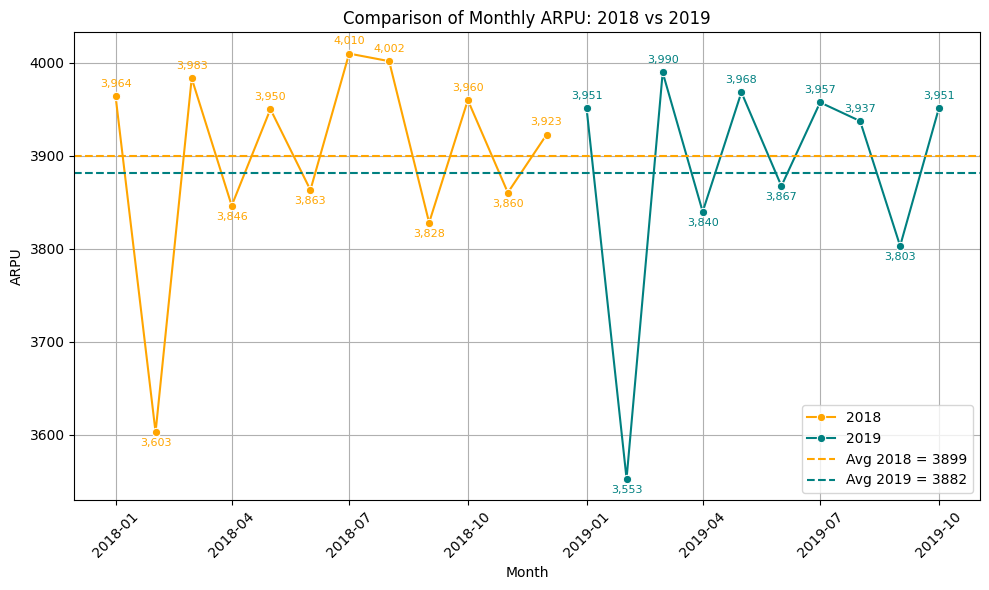

In [66]:
# Split into two datasets for comparison
arpu_latest = arpu_filtered[arpu_filtered['year_month'].dt.year == latest_year]
arpu_prev = arpu_filtered[arpu_filtered['year_month'].dt.year == prev_year]

# Plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=arpu_prev, x='year_month', y='arpu', marker='o', label=f'{prev_year}', color='orange')
sns.lineplot(data=arpu_latest, x='year_month', y='arpu', marker='o', label=f'{latest_year}', color='teal')

# Add horizontal average lines
plt.axhline(avg_arpu_prev, color='orange', linestyle='--', label=f'Avg {prev_year} = {avg_arpu_prev:.0f}')
plt.axhline(avg_arpu_latest, color='teal', linestyle='--', label=f'Avg {latest_year} = {avg_arpu_latest:.0f}')

# Annotate Y-values for previous year
for x, y in zip(arpu_prev['year_month'], arpu_prev['arpu']):
    ax.text(x, y+10 if y > avg_arpu_prev else y-15, f'{y:,.0f}',
            color='orange', ha='center', fontsize=8)

# Annotate Y-values for latest year
for x, y in zip(arpu_latest['year_month'], arpu_latest['arpu']):
    ax.text(x, y+10 if y > avg_arpu_latest else y-15, f'{y:,.0f}',
            color='teal', ha='center', fontsize=8)

plt.title(f'Comparison of Monthly ARPU: {prev_year} vs {latest_year}')
plt.xlabel('Month')
plt.ylabel('ARPU')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Key insides:
1- Average ARPU Comparison
- 2018 average ARPU: 3,899.40 USD
- 2019 average ARPU: 3,881.80 USD

➝ Overall ARPU in 2019 is slightly lower (-$17) than in 2018, indicating flat performance year-over-year.

2- Stability
- 2018 shows frequent fluctuations, with sharp drops (e.g., January ~3,600 USD).
- 2019 shows more volatility, with extreme dips (e.g., February ~3,550 USD, one of the lowest values).

3- Trend Observations
- Both years hover around the 3900 range, showing no significant growth.
- 2018 maintained more months above 3900 compared to 2019, which struggled to consistently stay above average.

4- Seasonal Behavior
- Both years demonstrate recurring dips followed by rebounds, suggesting seasonal patterns (possibly linked to spending cycles).
- The biggest drop in 2019 (Feb) is sharper than any 2018 decline, highlighting increased volatility.

### Recommendations
* Stabilization Focus: Investigate causes of 2019 volatility (e.g., economic slowdown, customer churn, or external factors).
* Growth Opportunity: ARPU stagnation suggests the need for new product bundles or upselling strategies to lift averages.
* Seasonality Planning: Launch campaigns during dip months (early year) to smooth out fluctuations.
* Customer Retention: Since averages remain flat, maintaining loyal high-value users is key while seeking moderate ARPU growth.

## b. New customers

In [67]:
# Add 'is_new_customer' if not already present
if 'is_new_customer' not in trans_arpu.columns:
    first_trans = trans_arpu.groupby('client_id')['date'].min().reset_index()
    first_trans.rename(columns={'date': 'first_transaction_date'}, inplace=True)
    trans_arpu = trans_arpu.merge(first_trans, on='client_id', how='left')
    trans_arpu['is_new_customer'] = trans_arpu['date'] == trans_arpu['first_transaction_date']

# Extract year
trans_arpu['year'] = trans_arpu['date'].dt.year

# Group by year to count new customers
yearly_new_customers = (
    trans_arpu[trans_arpu['is_new_customer']]
    .groupby('year')['client_id']
    .nunique()
    .reset_index()
    .rename(columns={'client_id': 'new_clients'})
)
yearly_new_customers

# Remove the unsed dataframe
# del trans_arpu
# import gc
# gc.collect()

,year,new_clients
0,2010,1137
1,2011,30
2,2012,15
3,2013,12
4,2014,8
5,2015,9
6,2016,6
7,2017,2


=> The transaction data absolutely does not have enough information on new customers for each year

## c. Gross Margin
The Gross Margin information is based on a research online from the link https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/margin.html

In [68]:
# Merge transaction data with MCC gross margin data
trans_margin = trans_cleaned.merge(mcc_gross_margin, on='mcc', how='left')
trans_margin[['mcc', 'description', 'industry', 'Gross Margin']].head()

,mcc,description,industry,Gross Margin
0,5311,Department Stores,Retail (General),0.322151
1,4829,NaN,NaN,NaN
2,5813,Drinking Places (Alcoholic Beverages),Restaurant/Dining,0.328958
3,5942,NaN,NaN,NaN
4,4784,NaN,NaN,NaN


In [96]:
# Tính trung bình Gross Margin (loại trừ NaN)
avg_gross_margin = mcc_gross_margin['Gross Margin'].mean()

# Thay thế NaN trong 'Gross Margin' của trans_margin bằng 25% của giá trị trung bình
trans_margin['Gross Margin'] = trans_margin['Gross Margin'].fillna(avg_gross_margin * 0.25)

# Tính trung bình Gross Margin sau khi xử lý (theo %)
average_gross_margin = round(trans_margin['Gross Margin'].mean() * 100, 2)

print(f"Average Gross Margin (%): {average_gross_margin}")

Average Gross Margin (%): 22.2


## d. Lifetime Value (LTV)

In [77]:
# Calculate lifetime span in days
cards['lifetime_days'] = (cards['expires'] - cards['acct_open_date']).dt.days

# Or in months (approximate)
cards['lifetime_months'] = cards['lifetime_days']// 30

# Calculate monthly LTV per customer
ltv_monthly = (
  trans_arpu
    .groupby(['client_id', 'year_month'])['amount']
    .sum()
    .reset_index()
    .rename(columns={'amount': 'ltv'})
)

 # Calculate average monthly LTV per client
avg_ltv_per_client = (
    ltv_monthly
    .groupby('client_id')['ltv']
    .mean()
    .reset_index()
    .rename(columns={'ltv': 'avg_monthly_ltv'})
)
#avg_ltv_per_client

# LifeTime Value
result = avg_ltv_per_client['avg_monthly_ltv'].mean()
print("LTV (Average) = {:,.2f}".format(result))

LTV (Average) = 3,866.54


# 5 . Export data

!!! Exporting the cleaned dataframes for further explorations in PowerBI !!!

In [ ]:
from google.colab import drive, files
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Create export folder
folder = '/content/drive/MyDrive/final_project_exports/'
os.makedirs(folder, exist_ok=True)

# Define Excel file path
excel_file = os.path.join(folder, 'export_to_analysis.xlsx')

# Export to Excel with multiple sheets
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    users.to_excel(writer, sheet_name='Users', index=False)
    cards.to_excel(writer, sheet_name='Cards', index=False)
    mcc_codes.to_excel(writer, sheet_name='MCC_Codes', index=False)
    mcc_gross_margin.to_excel(writer, sheet_name='Gross_Margin', index=False)
    centroids_full.to_excel(writer, sheet_name='Cluster_Centroids', index=False)

# Download the Excel file
files.download(excel_file)

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ############################################################ #
# It would take 1GB from your Google Drive and upto 10 minutes #
# ############################################################ #

# Export trans_cluster (has been cleaned and segmented) to CSV
trans_cluster_csv = os.path.join(folder, 'trans_cluster.csv')
trans_cluster.to_csv(trans_cluster_csv, index=False)

# Download the CSV file
files.download(trans_cluster_csv)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --------------------------------- #
# Load to SQLite warehouse (if any) #
# --------------------------------- #

from sqlalchemy import create_engine

sqlite_engine = create_engine('sqlite:///data_cleanded.db')

users.to_sql('users', sqlite_engine, if_exists='replace', index=False)
cards.to_sql('cards', sqlite_engine, if_exists='replace', index=False)
mcc_codes.to_sql('mcc_codes', sqlite_engine, if_exists='replace', index=False)
mcc_gross_margin.to_sql('mcc_gross_margin', sqlite_engine, if_exists='replace', index=False)
trans_cleaned.to_sql('trans', sqlite_engine, if_exists='replace', index=False)

print("ETL process completed successfully.")

In [ ]:
# Export the merchant information for reference
merchant = trans_cluster[['merchant_id', 'use_chip', 'merchant_city', 'merchant_state']]
merchant = merchant.drop_duplicates()

# Export merchant to CSV
merchant_csv = os.path.join(folder, 'merchant.csv')
merchant.to_csv(merchant_csv, index=False)

# Download the CSV file
files.download(merchant_csv)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>